# Project Goal

- [Data](https://www.kaggle.com/competitions/petfinder-adoption-prediction/data) given by a Malaysian animal welfare platform called PetFinder; 
- Gain insights to understand how pets' AdoptionSpeed is affected by various factors 
1) predict pets' AdoptionSpeed
2) create segments of pet profile


## Available Data

File descriptions
* train.csv - Tabular/text data for the training set
* test.csv - Tabular/text data for the test set
* sample_submission.csv - A sample submission file in the correct format
* breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* color_labels.csv - Contains ColorName for each ColorID
* state_labels.csv - Contains StateName for each StateID
<br>

Data Fields
* PetID - Unique hash ID of pet profile
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* Type - Type of animal (1 = Dog, 2 = Cat)
* Name - Name of pet (Empty if not named)
* Age - Age of pet when listed, in months
* Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
* Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
* Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
* Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* Quantity - Number of pets represented in profile
* Fee - Adoption fee (0 = Free)
* State - State location in Malaysia (Refer to StateLabels dictionary)
* RescuerID - Unique hash ID of rescuer
* VideoAmt - Total uploaded videos for this pet
* PhotoAmt - Total uploaded photos for this pet
* Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.
<br>

AdoptionSpeed
<br>Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: 
* 0 - Pet was adopted on the same day as it was listed. 
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# ignore warning
import warnings
warnings.filterwarnings('ignore')
# set auto reload packages / modules
%load_ext autoreload
%autoreload 2

In [2]:
# import libiary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from matplotlib import pyplot

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
import statistics

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 50)
pd.set_option("display.max_colwidth", None)

# EDA

In [5]:
# train/test set
train = pd.read_csv('./data/mytrain.csv')
test = pd.read_csv('./data/mytest.csv')
# reference labels 
breed_labels = pd.read_csv('./data/breed_labels.csv')
color_labels = pd.read_csv('./data/color_labels.csv')
state_labels = pd.read_csv('./data/state_labels.csv')

**the reference label data set is just for interpretation purpose. The data set given has helped me complete the encoding step**

In [6]:
train.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age',
       'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed'],
      dtype='object')

In [7]:
train.head(2)

Unnamed: 0  Type               Name  Age  \
0       10070     1  The Adorable Trio    2   
1       13397     1              Perky   12   

   Breed1  Breed2  Gender  Color1  Color2  \
0     307     307       1       1       0   
1     307       0       2       2       0   

   Color3  MaturitySize  FurLength  Vaccinated  \
0       0             2          2           2   
1       0             1          1           1   

   Dewormed  Sterilized  Health  Quantity  Fee  \
0         1           2       1         3    0   
1         1           1       1         1    0   

   State                         RescuerID  \
0  41326  ba248f761903dcd4c4342cc724a52145   
1  41326  744fa4278196568a18fcf5cd7d324ed2   

   VideoAmt  \
0         0   
1         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  \
0  These 3 puppies was rescued from a mechanic shop in sentul, apparently we managed to save 4 out of the initially 6 puppies. Also these 3 are really energetic and very playful, you will love their enthusiasm and adorableness...^^, hence if anyone is interested in adopting and providing a good home for them, please feel free to whats app or call(Mohan) or(Charlie) *i would prefer whatsapp as i am a student because i will be in and out classes often   
1                                                                                                                                                                                                                                                                                                                                                                                       Rescued from the dog pound. Great survivor. Very perky, lovable and friendly.   

       PetID  PhotoAmt  AdoptionSpeed  
0  23b64fe21      8.00              2  
1  6e09bfe1f      3.00              3

In [8]:
train.AdoptionSpeed.value_counts()

4    3357
2    3230
3    2607
1    2472
0     328
Name: AdoptionSpeed, dtype: int64

# I wanted to simplify the problem - transform the y target into binary - adopted within a month or longer than a month

In [9]:
train['y'] = train.AdoptionSpeed.map({0: 1, 1: 1, 2: 1, 3: 0, 4: 0})
# 1 - adopted within a month
# 0 - adopted longer than a month

<AxesSubplot: >

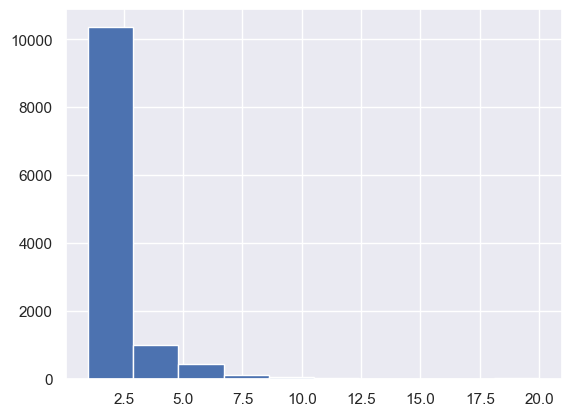

In [10]:
train.Quantity.hist()

## some rationale about my feature processing:

- name is not useful
- <del>quantity - I might prefer to filter out the adoption profile where multiple pets are represent<del>
- video features & text feature could be pretty useful
- the provided text sentitment file include the sentiment score of the Description field, but the score is built on each sentence level. Thus, it would be difficult to use. Not every sentence in the description field describe the characterisctics of pets - it could be emotional expression or financial condition of the household who donote the pets. As a result, I don't want to directly incoprate those sentiment data as my features.
- I will use the given features first, and depends on model performance, add more useful features in

## rationale for sample design
- keep test data as the unseen data 
- split the train data into train and validation set and use the two set (with cross validation) to build model and train 

In [11]:
train.shape
test.shape

(11994, 26)

(2999, 25)

In [12]:
train.describe()

Unnamed: 0     Type      Age   Breed1  \
count    11994.00 11994.00 11994.00 11994.00   
mean      7503.78     1.46    10.52   265.18   
std       4329.03     0.50    18.33    60.09   
min          0.00     1.00     0.00     0.00   
25%       3749.50     1.00     2.00   265.00   
50%       7515.50     1.00     3.00   266.00   
75%      11262.50     2.00    12.00   307.00   
max      14992.00     2.00   255.00   307.00   

        Breed2   Gender   Color1   Color2  \
count 11994.00 11994.00 11994.00 11994.00   
mean     74.59     1.78     2.24     3.21   
std     123.21     0.68     1.75     2.75   
min       0.00     1.00     1.00     0.00   
25%       0.00     1.00     1.00     0.00   
50%       0.00     2.00     2.00     2.00   
75%     187.00     2.00     3.00     6.00   
max     307.00     3.00     7.00     7.00   

        Color3  MaturitySize  FurLength  \
count 11994.00      11994.00   11994.00   
mean      1.87          1.86       1.47   
std       2.98          0.55       0.60   
min       0.00          1.00       1.00   
25%       0.00          2.00       1.00   
50%       0.00          2.00       1.00   
75%       5.00          2.00       2.00   
max       7.00          4.00       3.00   

       Vaccinated  Dewormed  Sterilized  \
count    11994.00  11994.00    11994.00   
mean         1.74      1.56        1.91   
std          0.67      0.70        0.57   
min          1.00      1.00        1.00   
25%          1.00      1.00        2.00   
50%          2.00      1.00        2.00   
75%          2.00      2.00        2.00   
max          3.00      3.00        3.00   

        Health  Quantity      Fee    State  \
count 11994.00  11994.00 11994.00 11994.00   
mean      1.04      1.59    21.40 41345.91   
std       0.20      1.51    79.78    32.39   
min       1.00      1.00     0.00 41324.00   
25%       1.00      1.00     0.00 41326.00   
50%       1.00      1.00     0.00 41326.00   
75%       1.00      1.00     0.00 41401.00   
max       3.00     20.00  3000.00 41415.00   

       VideoAmt  PhotoAmt  AdoptionSpeed  \
count  11994.00  11994.00       11994.00   
mean       0.06      3.89           2.52   
std        0.34      3.49           1.18   
min        0.00      0.00           0.00   
25%        0.00      2.00           2.00   
50%        0.00      3.00           2.00   
75%        0.00      5.00           4.00   
max        8.00     30.00           4.00   

             y  
count 11994.00  
mean      0.50  
std       0.50  
min       0.00  
25%       0.00  
50%       1.00  
75%       1.00  
max       1.00

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: >

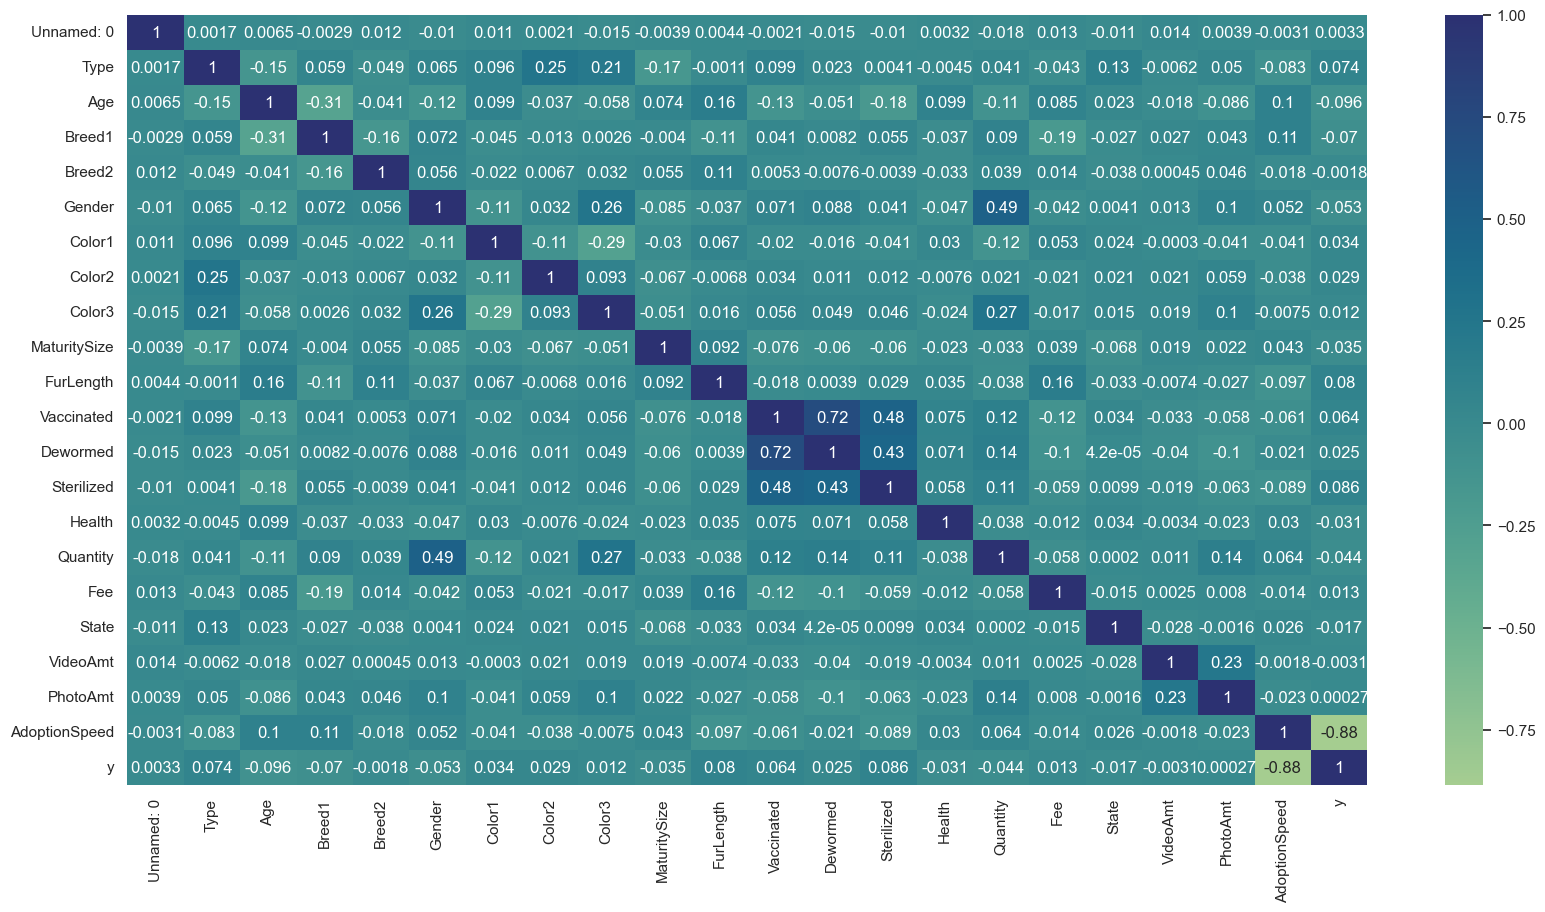

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='crest',annot=True)
# heatmap for correlation

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: >

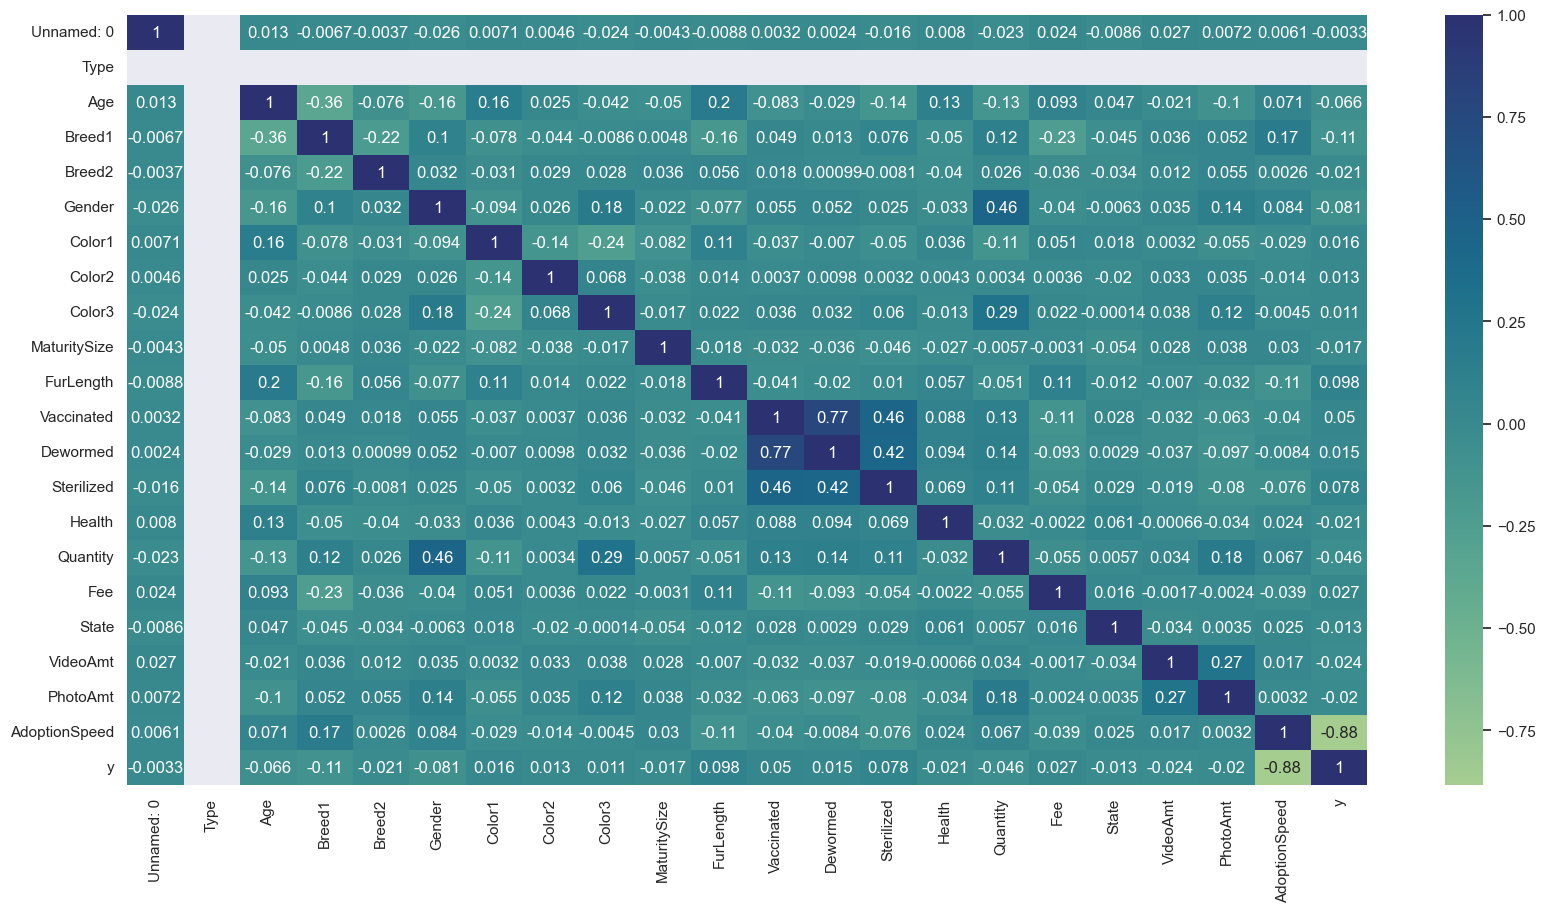

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(train[train.Type == 1].corr(),cmap='crest',annot=True)
# heatmap for correlation

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: >

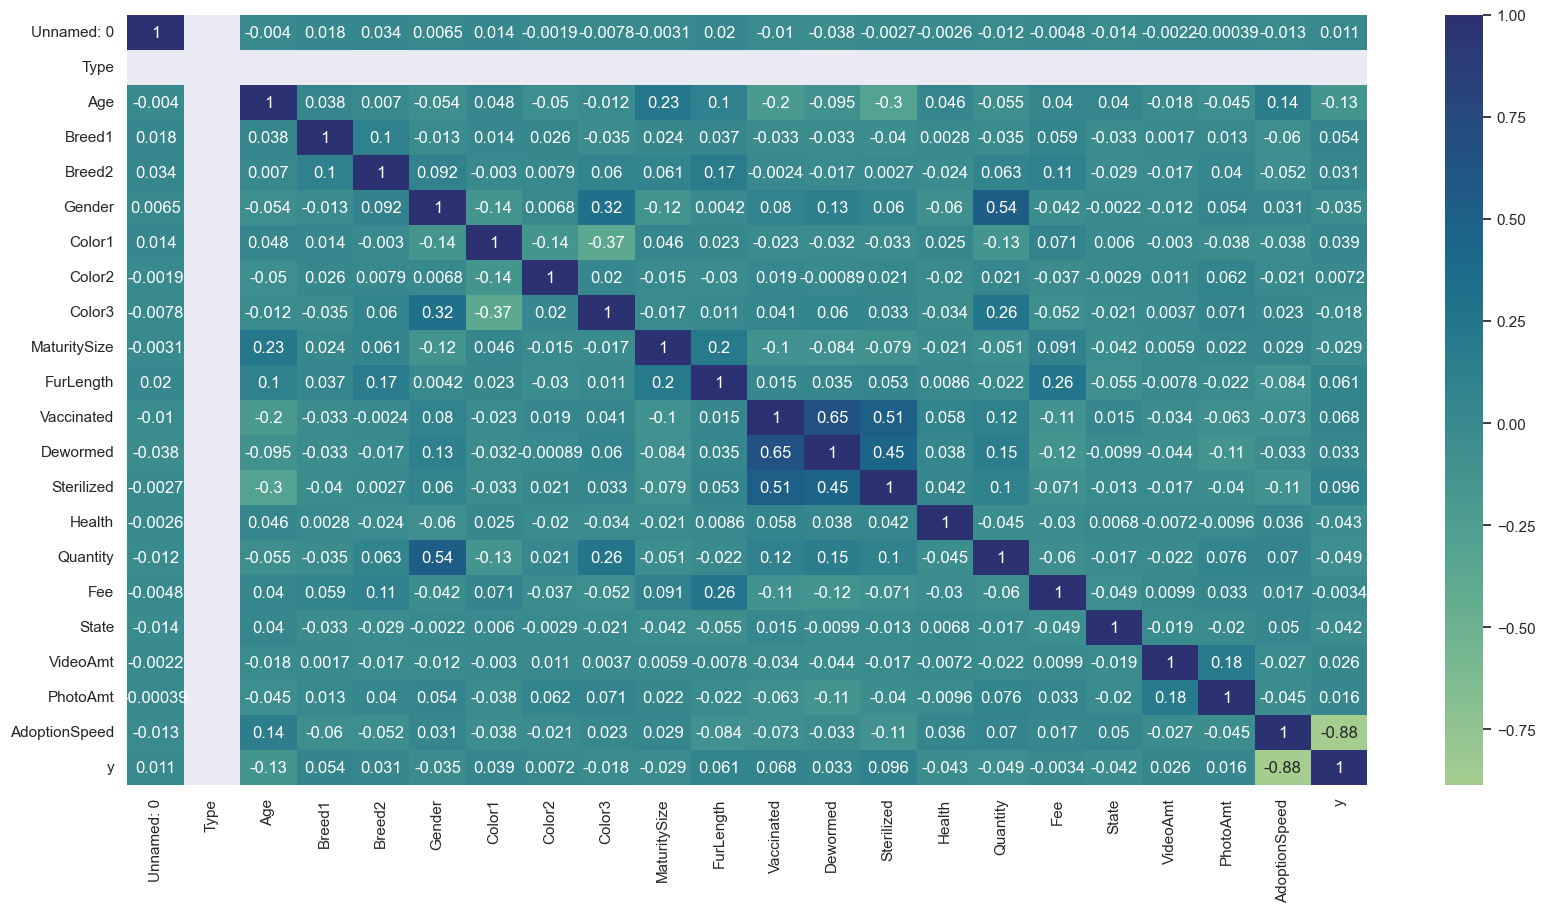

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(train[train.Type == 2].corr(),cmap='crest',annot=True)
# heatmap for correlation

In [16]:
correlation = pd.concat([train[train.Type == 1].corr()[['y']], train[train.Type == 2].corr()[['y']]], axis = 1)

In [17]:
correlation.columns = ['Dog', 'Cat']

In [18]:
correlation

Dog   Cat
Unnamed: 0    -0.00  0.01
Type            NaN   NaN
Age           -0.07 -0.13
Breed1        -0.11  0.05
Breed2        -0.02  0.03
Gender        -0.08 -0.03
Color1         0.02  0.04
Color2         0.01  0.01
Color3         0.01 -0.02
MaturitySize  -0.02 -0.03
FurLength      0.10  0.06
Vaccinated     0.05  0.07
Dewormed       0.02  0.03
Sterilized     0.08  0.10
Health        -0.02 -0.04
Quantity      -0.05 -0.05
Fee            0.03 -0.00
State         -0.01 -0.04
VideoAmt      -0.02  0.03
PhotoAmt      -0.02  0.02
AdoptionSpeed -0.88 -0.88
y              1.00  1.00

(0.0, 150.0)

(-50.0, 1000.0)

<AxesSubplot: xlabel='Age', ylabel='Fee'>

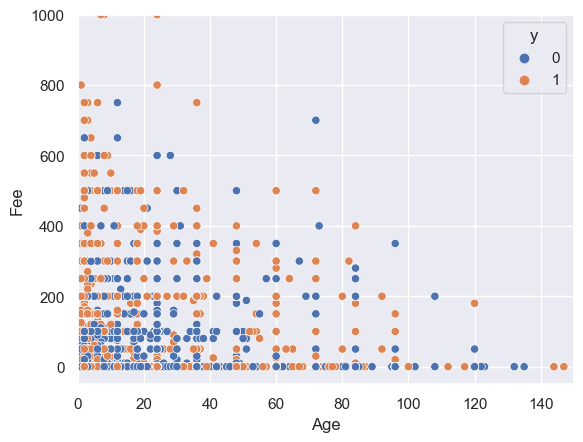

In [19]:
plt.xlim([0, 150])
plt.ylim([-50, 1000])
sns.scatterplot(data=train, x="Age", y="Fee", hue = "y")

<AxesSubplot: xlabel='y', ylabel='Count'>

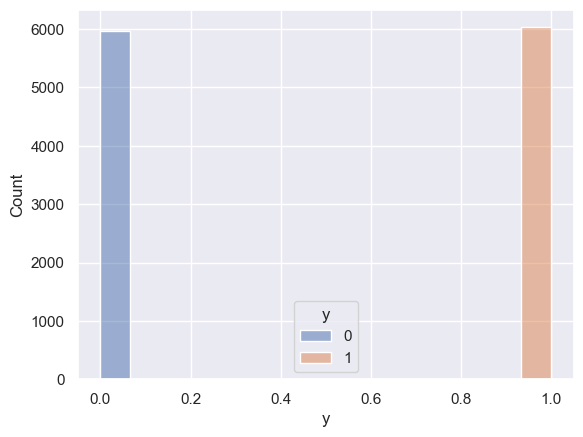

In [20]:
sns.histplot(data=train, x="y", hue = "y")

<AxesSubplot: xlabel='AdoptionSpeed', ylabel='Count'>

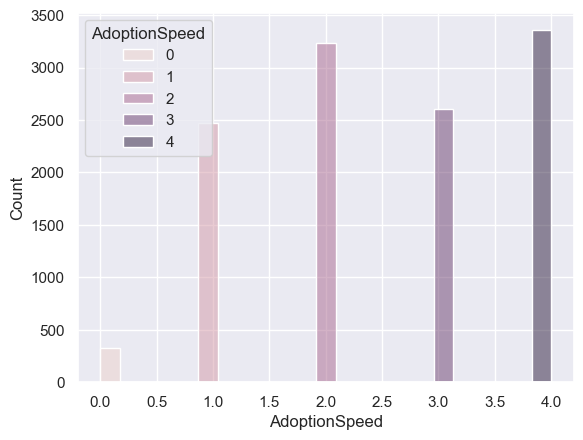

In [21]:
sns.histplot(data=train, x="AdoptionSpeed", hue = "AdoptionSpeed")

<AxesSubplot: xlabel='Dewormed', ylabel='AdoptionSpeed'>

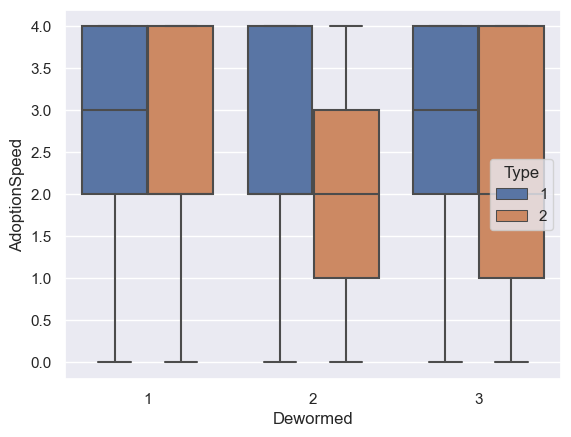

In [22]:
sns.boxplot(data=train, x="Dewormed", y="AdoptionSpeed", hue = "Type")
# dewormed cat got adopted faster

<AxesSubplot: xlabel='Sterilized', ylabel='AdoptionSpeed'>

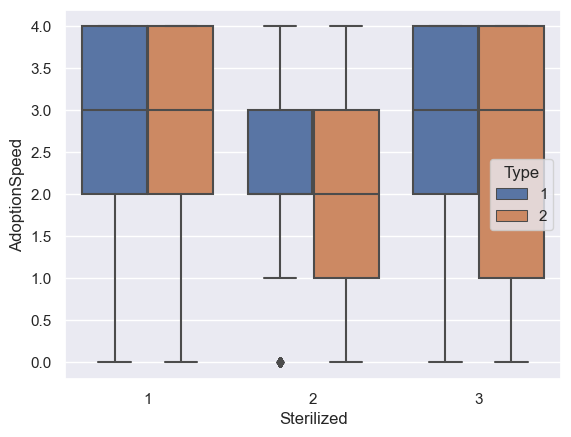

In [23]:
sns.boxplot(data=train, x="Sterilized", y="AdoptionSpeed", hue = "Type")
# not sterilized pets got adopted faster


<AxesSubplot: xlabel='Health', ylabel='AdoptionSpeed'>

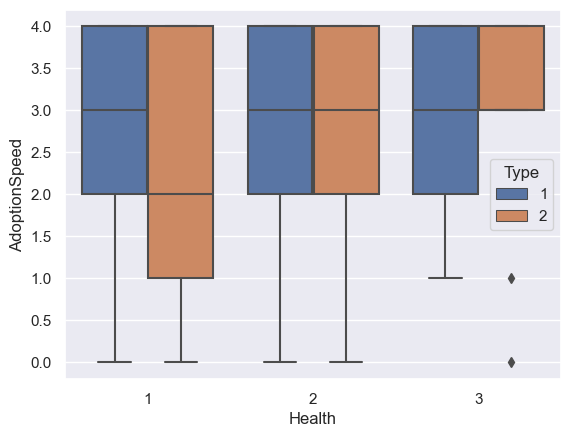

In [24]:
sns.boxplot(data=train, x="Health", y="AdoptionSpeed", hue = "Type")
# healthy pets got adopted faster



<AxesSubplot: xlabel='FurLength', ylabel='AdoptionSpeed'>

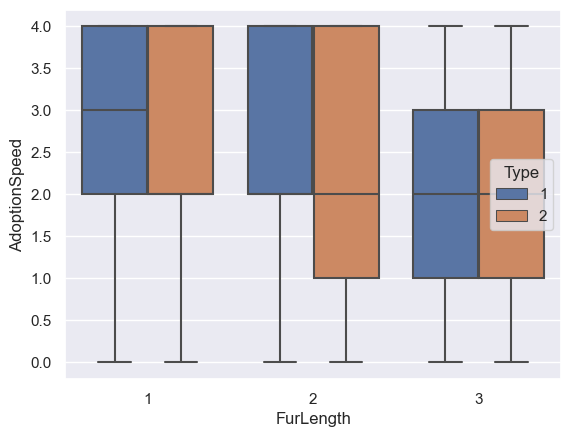

In [25]:
sns.boxplot(data=train, x="FurLength", y="AdoptionSpeed", hue = "Type")
# long-hair pets got adopted faster




<AxesSubplot: xlabel='VideoAmt', ylabel='AdoptionSpeed'>

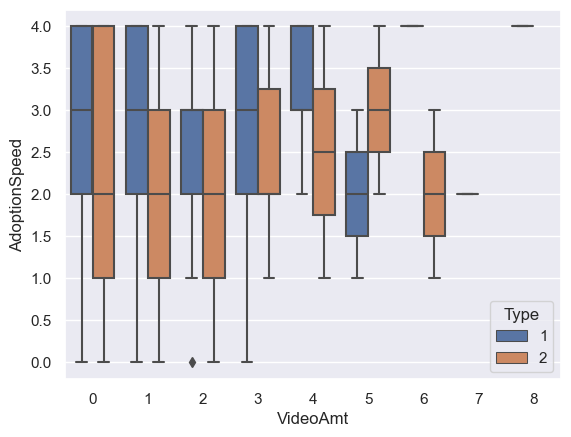

In [26]:
sns.boxplot(data=train, x="VideoAmt", y="AdoptionSpeed", hue = "Type")
# for cat, less video amt actually increase adoption speed

<AxesSubplot: xlabel='PhotoAmt', ylabel='AdoptionSpeed'>

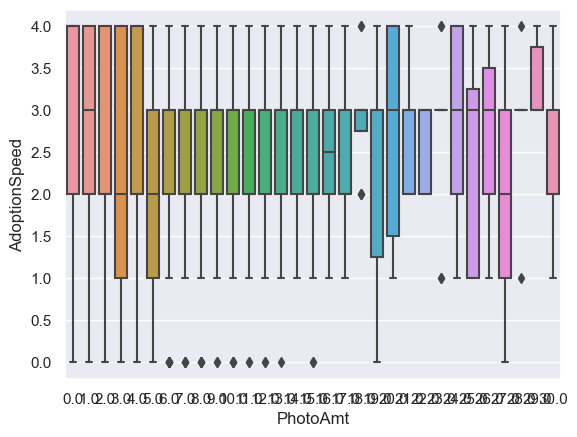

In [27]:
sns.boxplot(data=train, x="PhotoAmt", y="AdoptionSpeed")

<AxesSubplot: xlabel='State', ylabel='AdoptionSpeed'>

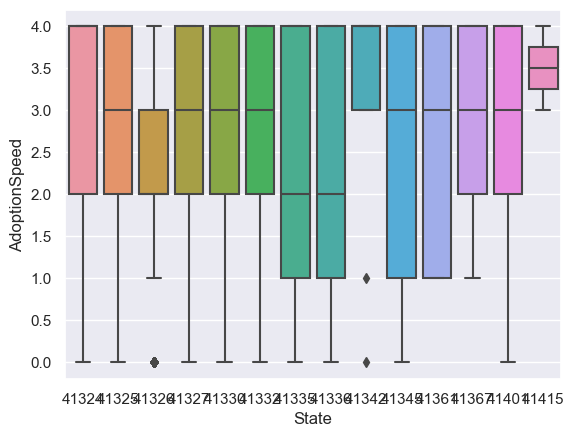

In [28]:
sns.boxplot(data=train, x="State", y="AdoptionSpeed")
# certain state have higher adoption speed

<AxesSubplot: xlabel='Color1', ylabel='AdoptionSpeed'>

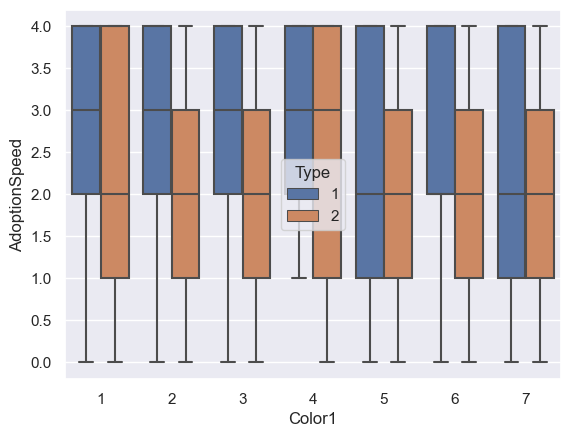

In [29]:
sns.boxplot(data=train, x="Color1", y="AdoptionSpeed", hue = 'Type')
# certain state have higher adoption speed

<AxesSubplot: xlabel='Color1', ylabel='AdoptionSpeed'>

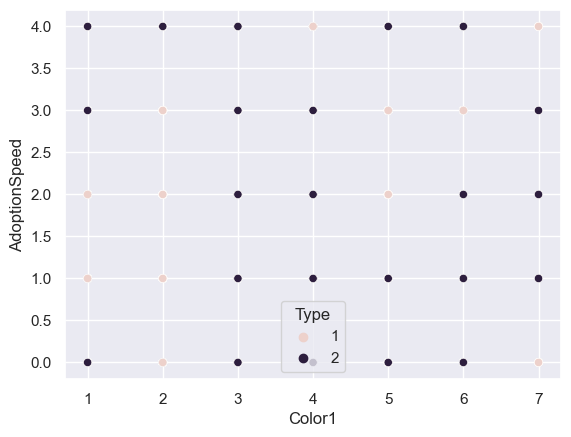

In [30]:
sns.scatterplot(data=train, x="Color1", y="AdoptionSpeed", hue = 'Type')
# certain state have higher adoption speed

# model development

## simple baseline 
- no feature eng, simple logistic regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold

In [33]:
train.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age',
       'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'y'],
      dtype='object')

In [34]:
var = ['Type', 'Age', 'Breed1', 'Breed2',
       'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'State', 
       'VideoAmt',
       'PhotoAmt']

In [35]:
X = train[var]
y = train['y']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify= y)

In [37]:
X_train.shape
X_val.shape

(8395, 19)

(3599, 19)

In [38]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(multi_class='multinomial', solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_val)
val_acc = pipe_lr.score(X_val, y_val)
print(f'Validation accuracy: {val_acc:.3f}')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

Validation accuracy: 0.594


In [39]:
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.57832043 0.59321024 0.56938654 0.57712924 0.59321024]
CV accuracy: 0.582 +/- 0.009


Text(0.5, 0, 'Number of training examples')

Text(0, 0.5, 'Accuracy')

(0.3, 1.03)

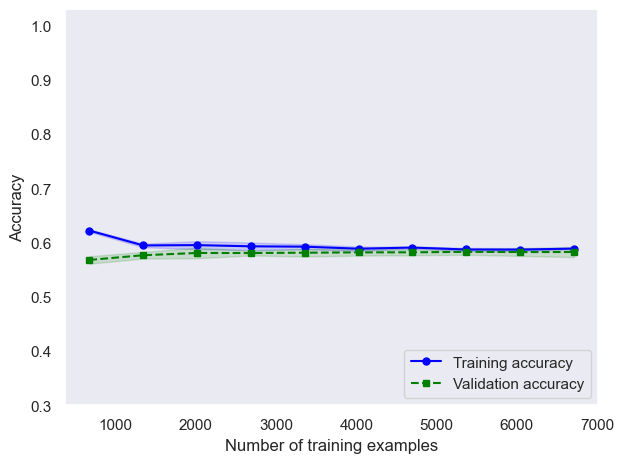

In [40]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

In [41]:
# from this training curve, we see no overfitting issue, but see high bias 

In [44]:
pd.DataFrame(y_pred).value_counts()

1    1908
0    1691
dtype: int64

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

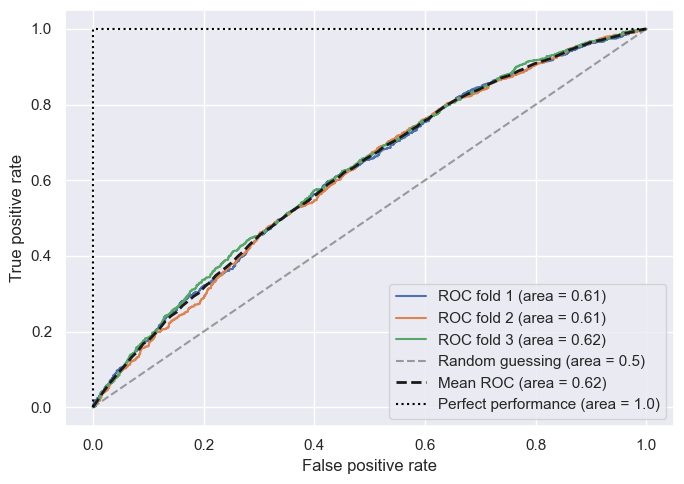

In [45]:


cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_data, test_data) in enumerate(cv):
    probas = pipe_lr.fit(X_train.values[train_data],
                         y_train.values[train_data]).predict_proba(X_train.values[test_data])

    fpr, tpr, thresholds = roc_curve(y_train.values[test_data],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


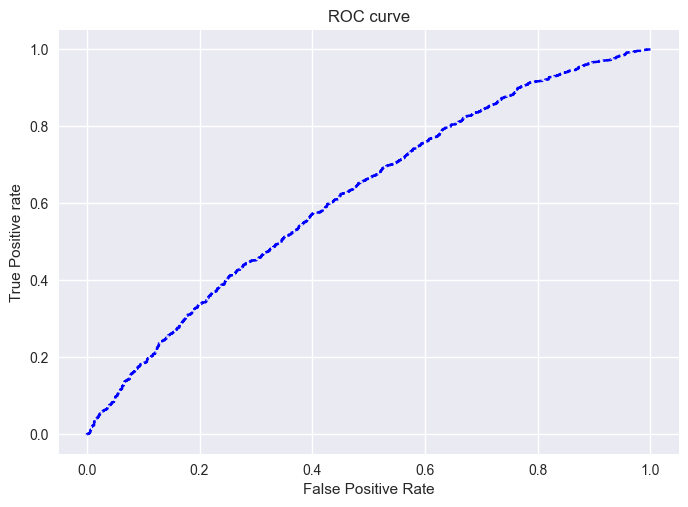

In [46]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix \n')

Text(0.5, 36.72222222222221, '\n Predicted Values\n')

Text(95.72222222222221, 0.5, 'Actual Values\n')

[Text(0.5, 0, 'more than 1 month'), Text(1.5, 0, 'within 1 month')]

[Text(0, 0.5, 'more than 1 month'), Text(0, 1.5, 'within 1 month')]

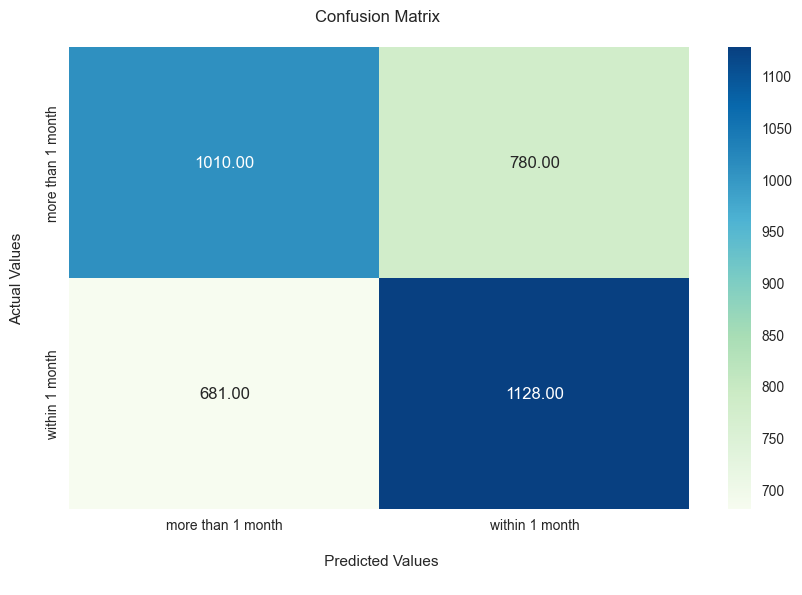

In [47]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
fx.yaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
plt.show()

Feature: 0, Score: 0.05098
Feature: 1, Score: -0.12526
Feature: 2, Score: -0.11180
Feature: 3, Score: -0.02466
Feature: 4, Score: -0.03169
Feature: 5, Score: 0.03209
Feature: 6, Score: 0.01404
Feature: 7, Score: 0.03421
Feature: 8, Score: -0.01380
Feature: 9, Score: 0.09738
Feature: 10, Score: 0.04427
Feature: 11, Score: -0.05731
Feature: 12, Score: 0.08697
Feature: 13, Score: -0.03139
Feature: 14, Score: -0.05228
Feature: 15, Score: -0.00045
Feature: 16, Score: -0.05110
Feature: 17, Score: -0.00565
Feature: 18, Score: -0.00253


<BarContainer object of 19 artists>

([<matplotlib.axis.XTick at 0x7f93eb08a250>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

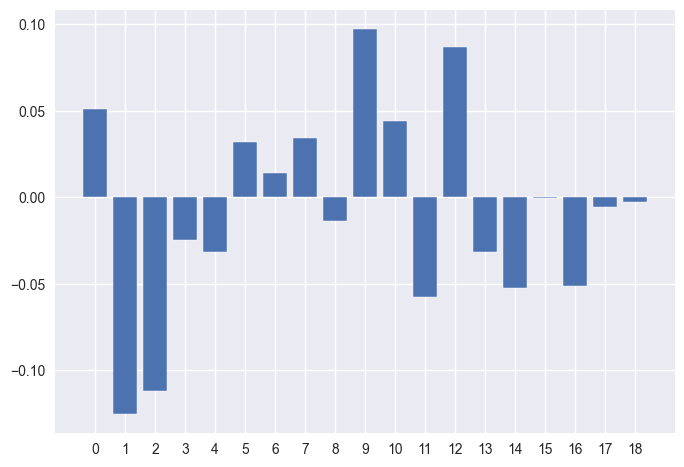

In [48]:
importance = pipe_lr['logisticregression'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0, 19))
pyplot.show()

In [49]:
feature_imp = pd.DataFrame(zip(var, list(importance)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [50]:
feature_imp

var  importance
9      FurLength        0.10
12    Sterilized        0.09
0           Type        0.05
10    Vaccinated        0.04
7         Color3        0.03
5         Color1        0.03
6         Color2        0.01
15           Fee       -0.00
18      PhotoAmt       -0.00
17      VideoAmt       -0.01
8   MaturitySize       -0.01
3         Breed2       -0.02
13        Health       -0.03
4         Gender       -0.03
16         State       -0.05
14      Quantity       -0.05
11      Dewormed       -0.06
2         Breed1       -0.11
1            Age       -0.13

In [51]:
important_features_lr = feature_imp[feature_imp.importance.abs() >= 0.025]['var'].to_list()

## try xgboost

In [52]:
from xgboost import XGBClassifier

In [53]:
pipe_xgb = XGBClassifier()
pipe_xgb.fit(X_train, y_train)
y_pred = pipe_xgb.predict(X_val)
val_acc = pipe_xgb.score(X_val, y_val)
print(f'Validation accuracy: {val_acc:.3f}')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Validation accuracy: 0.644


In [54]:
scores = cross_val_score(estimator=pipe_xgb,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.6289458  0.64681358 0.62596784 0.66527695 0.63907088]
CV accuracy: 0.641 +/- 0.014


Text(0.5, 0, 'Number of training examples')

Text(0, 0.5, 'Accuracy')

(0.3, 1.03)

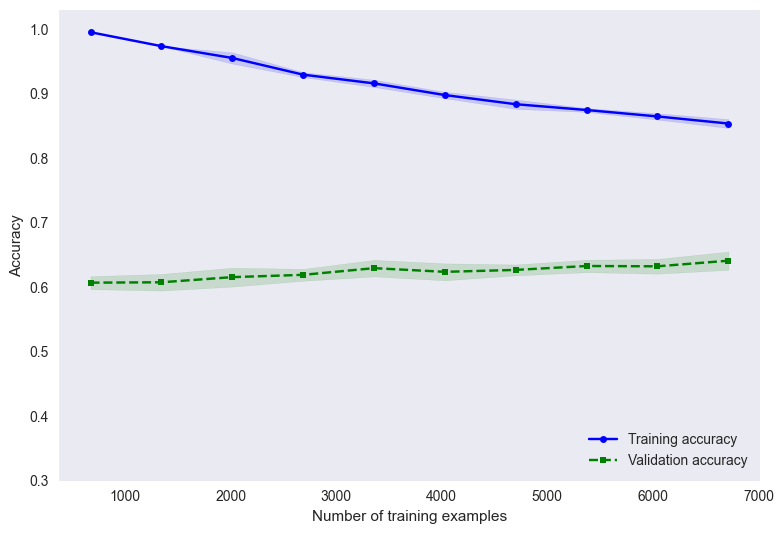

In [55]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_xgb,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

In [56]:
# from this training curve, we see pretty strong overfitting issue

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

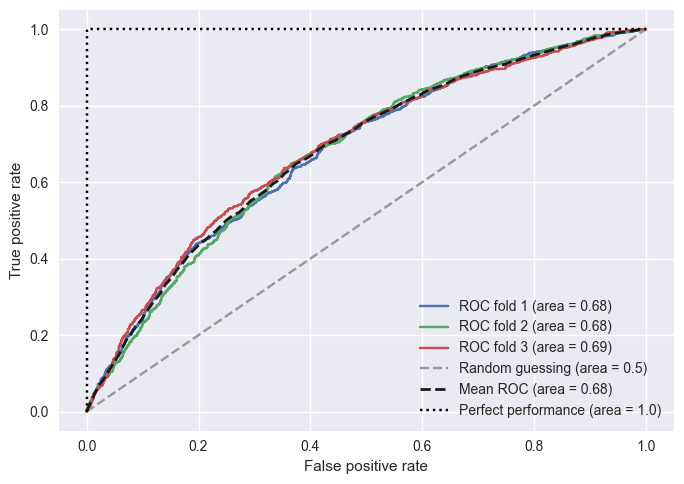

In [57]:
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_data, test_data) in enumerate(cv):
    probas = pipe_xgb.fit(X_train.values[train_data],
                         y_train.values[train_data]).predict_proba(X_train.values[test_data])

    fpr, tpr, thresholds = roc_curve(y_train.values[test_data],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix \n')

Text(0.5, 36.72222222222221, '\n Predicted Values\n')

Text(95.72222222222221, 0.5, 'Actual Values\n')

[Text(0.5, 0, 'more than 1 month'), Text(1.5, 0, 'within 1 month')]

[Text(0, 0.5, 'more than 1 month'), Text(0, 1.5, 'within 1 month')]

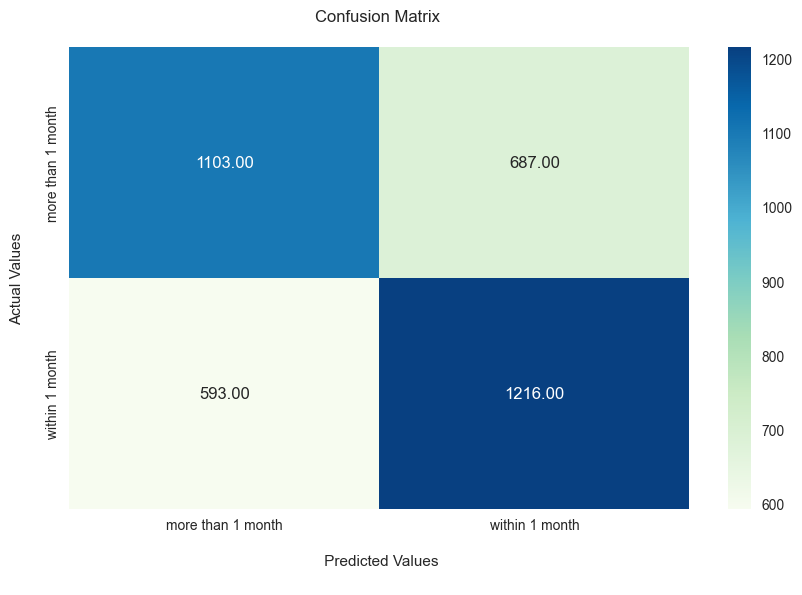

In [58]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
fx.yaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
plt.show()

Feature: 0, Score: 0.05801
Feature: 1, Score: 0.06514
Feature: 2, Score: 0.06606
Feature: 3, Score: 0.05327
Feature: 4, Score: 0.04966
Feature: 5, Score: 0.04790
Feature: 6, Score: 0.04430
Feature: 7, Score: 0.05012
Feature: 8, Score: 0.05093
Feature: 9, Score: 0.05125
Feature: 10, Score: 0.05828
Feature: 11, Score: 0.04369
Feature: 12, Score: 0.08106
Feature: 13, Score: 0.03793
Feature: 14, Score: 0.05543
Feature: 15, Score: 0.03837
Feature: 16, Score: 0.04719
Feature: 17, Score: 0.04946
Feature: 18, Score: 0.05196


<BarContainer object of 19 artists>

([<matplotlib.axis.XTick at 0x7f93d993a8b0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

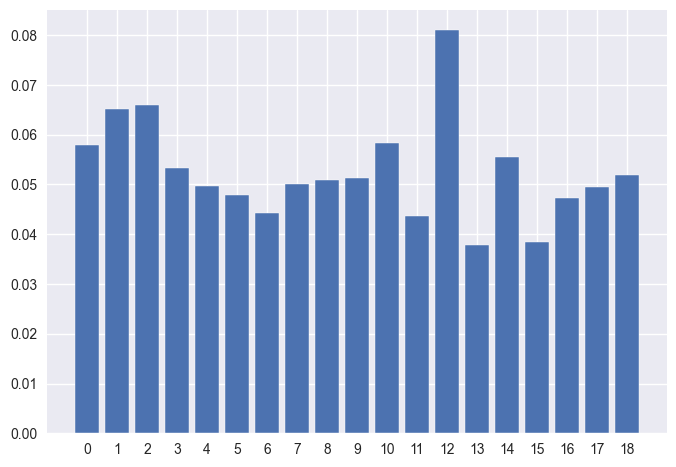

In [59]:
importance = pipe_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0, 19))
pyplot.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

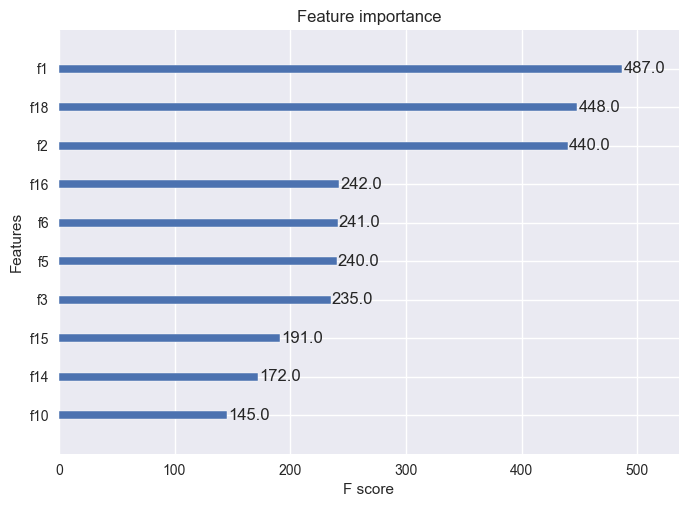

In [60]:
from xgboost import plot_importance
plot_importance(pipe_xgb, max_num_features=10) # top 10 most important features
plt.show()

In [61]:
feature_imp = pd.DataFrame(zip(var, list(importance)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [62]:
feature_imp

var  importance
12    Sterilized        0.08
2         Breed1        0.07
1            Age        0.07
10    Vaccinated        0.06
0           Type        0.06
14      Quantity        0.06
3         Breed2        0.05
18      PhotoAmt        0.05
9      FurLength        0.05
8   MaturitySize        0.05
7         Color3        0.05
4         Gender        0.05
17      VideoAmt        0.05
5         Color1        0.05
16         State        0.05
6         Color2        0.04
11      Dewormed        0.04
15           Fee        0.04
13        Health        0.04

In [63]:
important_features_xgb = feature_imp.head(12)['var'].to_list()

In [64]:
important_features_xgb

['Sterilized',
 'Breed1',
 'Age',
 'Vaccinated',
 'Type',
 'Quantity',
 'Breed2',
 'PhotoAmt',
 'FurLength',
 'MaturitySize',
 'Color3',
 'Gender']

In [65]:
important_features_lr

['FurLength',
 'Sterilized',
 'Type',
 'Vaccinated',
 'Color3',
 'Color1',
 'Health',
 'Gender',
 'State',
 'Quantity',
 'Dewormed',
 'Breed1',
 'Age']

In [66]:
len(set(important_features_xgb) & set(important_features_lr))

9

## given the feature importance and model performance, we need to 
1) perform better feature engineering
2) choose another algo

In [67]:
X_train.shape

(8395, 19)

In [68]:
len(var)

19

In [69]:
len(X_train) / len(var)

441.8421052631579

In [70]:
feature_imp['var'].to_list()

['Sterilized',
 'Breed1',
 'Age',
 'Vaccinated',
 'Type',
 'Quantity',
 'Breed2',
 'PhotoAmt',
 'FurLength',
 'MaturitySize',
 'Color3',
 'Gender',
 'VideoAmt',
 'Color1',
 'State',
 'Color2',
 'Dewormed',
 'Fee',
 'Health']

In [71]:
selected_var = ['FurLength',
 'Type',
 'Sterilized',
 'Vaccinated',
 'Color1',
 'Quantity',
 'Dewormed',
 'MaturitySize',
 'Health',
 'Gender',
 'Breed1',
 'Age']

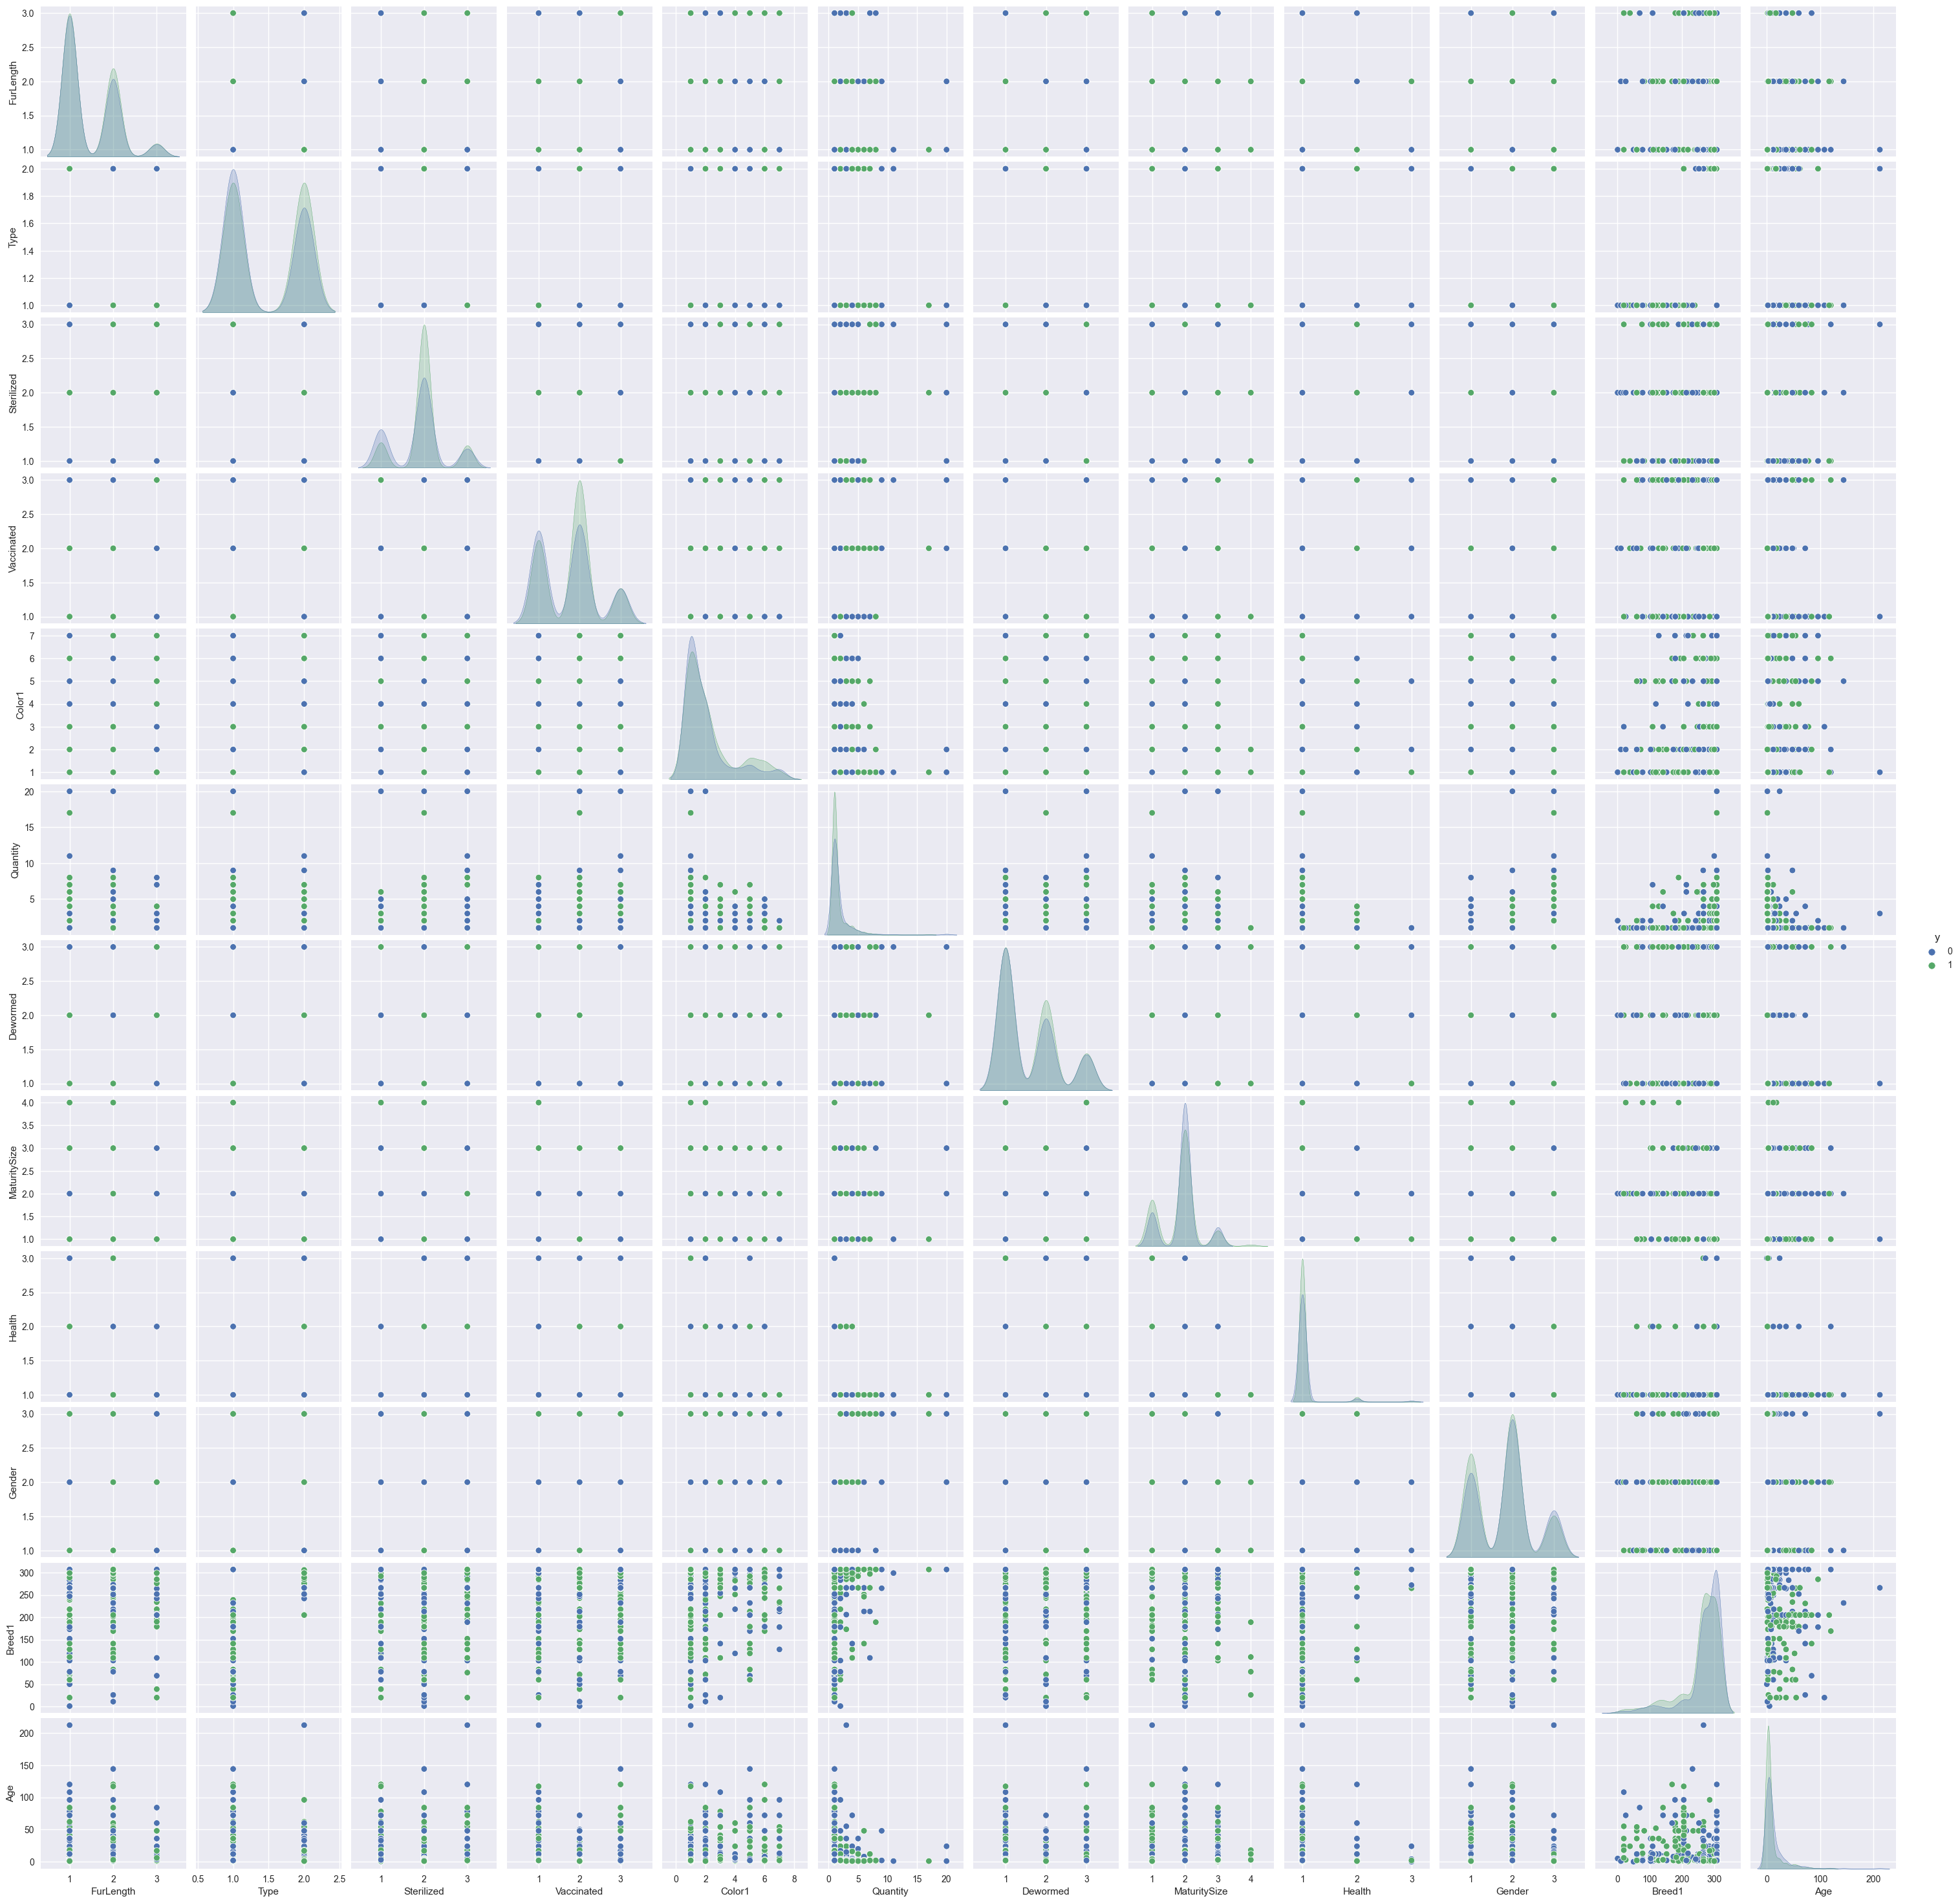

In [72]:
sns.pairplot(data=train[selected_var + ['y']].sample(n = 1000), hue="y")

In [73]:
print('hello world')

hello world


## feature engineering

In [74]:
train.shape

(11994, 26)

In [75]:
color_labels

ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White

In [76]:
train.Color1.value_counts()
train.Color2.value_counts()
train.Color3.value_counts()

1    5943
2    2986
3     761
5     711
6     565
7     533
4     495
Name: Color1, dtype: int64

0    3600
7    2749
2    2661
5     881
6     854
4     697
3     552
Name: Color2, dtype: int64

0    8515
7    2571
5     330
6     281
4     157
3     140
Name: Color3, dtype: int64

In [77]:
train.shape
train[train.Color1 != train.Color2].shape

(11994, 26)

(11994, 26)

In [78]:
train[train.Color2 == 0].shape

(3600, 26)

1)  HasBreed2: whether the pets have two breeds
<br>
2)  NumberOfColor: how many colors the pet have
<br>
3)  Sentiment Score of the description

In [79]:
train.loc[train.Breed2 == 0, 'HasBreed2'] = 0
train.loc[train.Breed2 != 0, 'HasBreed2'] = 1
test.loc[test.Breed2 == 0, 'HasBreed2'] = 0
test.loc[test.Breed2 != 0, 'HasBreed2'] = 1

In [80]:
train.HasBreed2.value_counts(dropna=False)

0.00    8572
1.00    3422
Name: HasBreed2, dtype: int64

In [81]:
train[train.Color2 == 0].Color3.value_counts()

0    3600
Name: Color3, dtype: int64

In [82]:
train.loc[(train.Color2 == 0), 'NumberOfColor'] = 1
train.loc[(train.Color2 != 0) & (train.Color3 == 0), 'NumberOfColor'] = 2
train.loc[(train.Color2 != 0) & (train.Color3 != 0), 'NumberOfColor'] = 3

In [83]:
test.loc[(test.Color2 == 0), 'NumberOfColor'] = 1
test.loc[(test.Color2 != 0) & (test.Color3 == 0), 'NumberOfColor'] = 2
test.loc[(test.Color2 != 0) & (test.Color3 != 0), 'NumberOfColor'] = 3

In [84]:
train.NumberOfColor.value_counts(dropna=False)

2.00    4915
1.00    3600
3.00    3479
Name: NumberOfColor, dtype: int64

In [85]:
train.Description.isnull().mean()

0.0007503751875937969

In [86]:
train.Description.fillna('neutral', inplace= True)
test.Description.fillna('neutral', inplace= True)

In [87]:
train.Description.head(5)

0    These 3 puppies was rescued from a mechanic shop in sentul, apparently we managed to save 4 out of the initially 6 puppies. Also these 3 are really energetic and very playful, you will love their enthusiasm and adorableness...^^, hence if anyone is interested in adopting and providing a good home for them, please feel free to whats app or call(Mohan) or(Charlie) *i would prefer whatsapp as i am a student because i will be in and out classes often
1                                                                                                                                                                                                                                                                                                                                                                                         Rescued from the dog pound. Great survivor. Very perky, lovable and friendly.
2                                                                                       

In [88]:
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

2023-04-03 09:06:01,832 loading file /Users/joycewang/.flair/models/sentiment-en-mix-distillbert_4.pt


In [89]:
import os
import json
sentment_files_train = os.listdir('./data/train_sentiment/')
sentment_files_test = os.listdir('./data/test_sentiment/')

In [90]:
petidList = []
doc_sentList = []
min_sentList = []
max_sentList = []
median_sentList = []
for i in sentment_files_train:
    petid = i.split('.')[0]
    petidList.append(petid)
    with open('./data/train_sentiment/' + i, 'r') as f:
        sentiment = json.load(f)
        sent_scores = [float(i['sentiment']['score']) for i in sentiment['sentences']]
        doc_sentList.append(float(sentiment['documentSentiment']['score']))
        max_sentList.append(max(sent_scores))
        min_sentList.append(min(sent_scores))
        median_sentList.append(statistics.median(sent_scores))

In [91]:
train_sentiment_features= pd.DataFrame([doc_sentList, min_sentList, max_sentList, median_sentList]).T
train_sentiment_features.columns = ['doc_sent', 'min_sent', 'max_sent', 'median_sent']

In [92]:
train_sentiment_features['PetID'] = petidList

In [93]:
petidList = []
doc_sentList = []
min_sentList = []
max_sentList = []
median_sentList = []
for i in sentment_files_test:
    petid = i.split('.')[0]
    petidList.append(petid)
    with open('./data/test_sentiment/' + i, 'r') as f:
        sentiment = json.load(f)
        sent_scores = [float(i['sentiment']['score']) for i in sentiment['sentences']]
        doc_sentList.append(float(sentiment['documentSentiment']['score']))
        max_sentList.append(max(sent_scores))
        min_sentList.append(min(sent_scores))
        median_sentList.append(statistics.median(sent_scores))

In [94]:
test_sentiment_features= pd.DataFrame([doc_sentList, min_sentList, max_sentList, median_sentList]).T
test_sentiment_features.columns = ['doc_sent', 'min_sent', 'max_sent', 'median_sent']

In [95]:
test_sentiment_features['PetID'] = petidList

In [96]:
test_sentiment_features.shape
test.shape

(3865, 5)

(2999, 27)

In [97]:
train = pd.merge(train, train_sentiment_features, left_on = 'PetID', right_on = 'PetID', how = 'left')
test = pd.merge(test, test_sentiment_features, left_on = 'PetID', right_on = 'PetID', how = 'left')

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: >

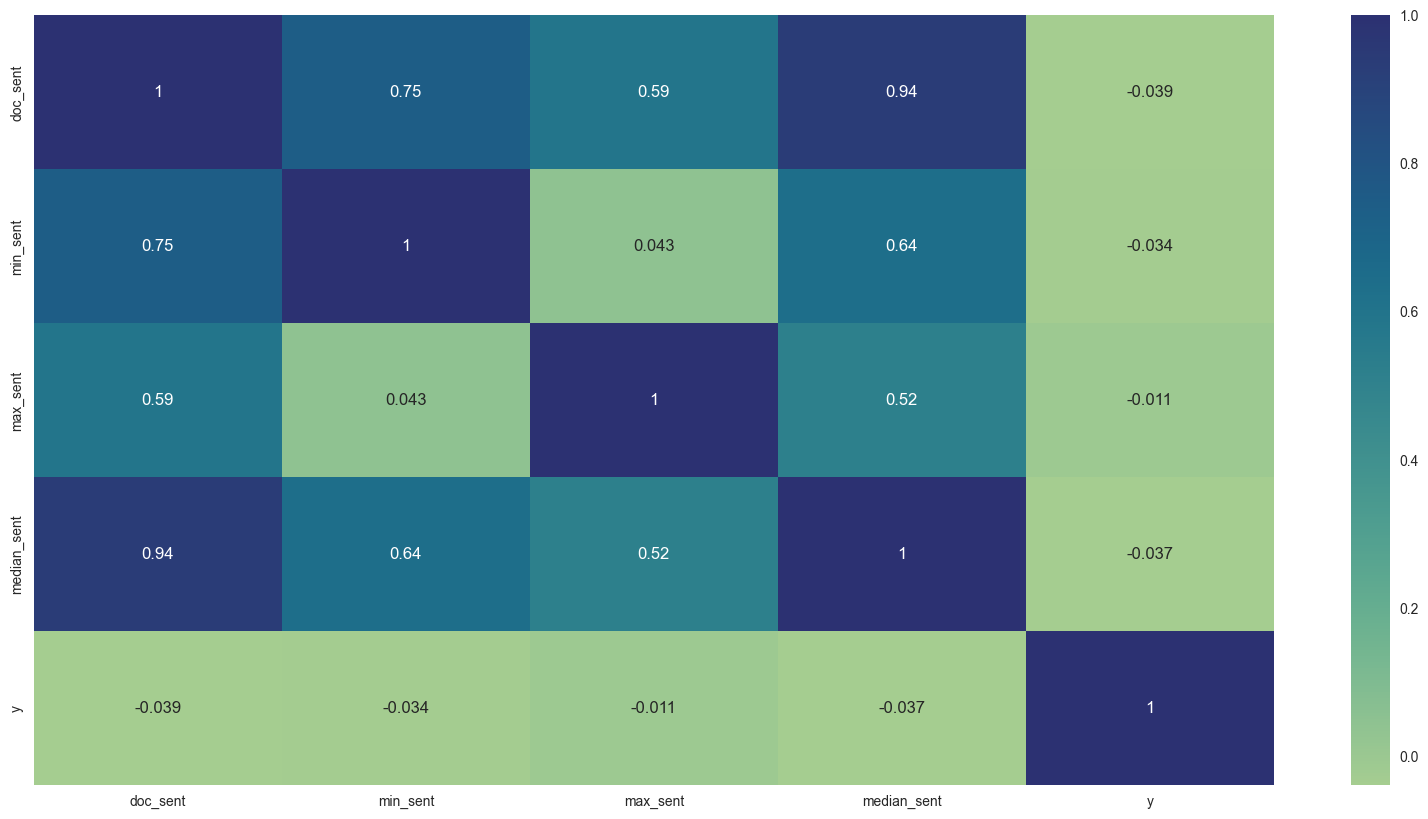

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(train[train.doc_sent.notnull()][['doc_sent', 'min_sent', 'max_sent', 'median_sent', 'y']].corr(),cmap='crest',annot=True)

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: >

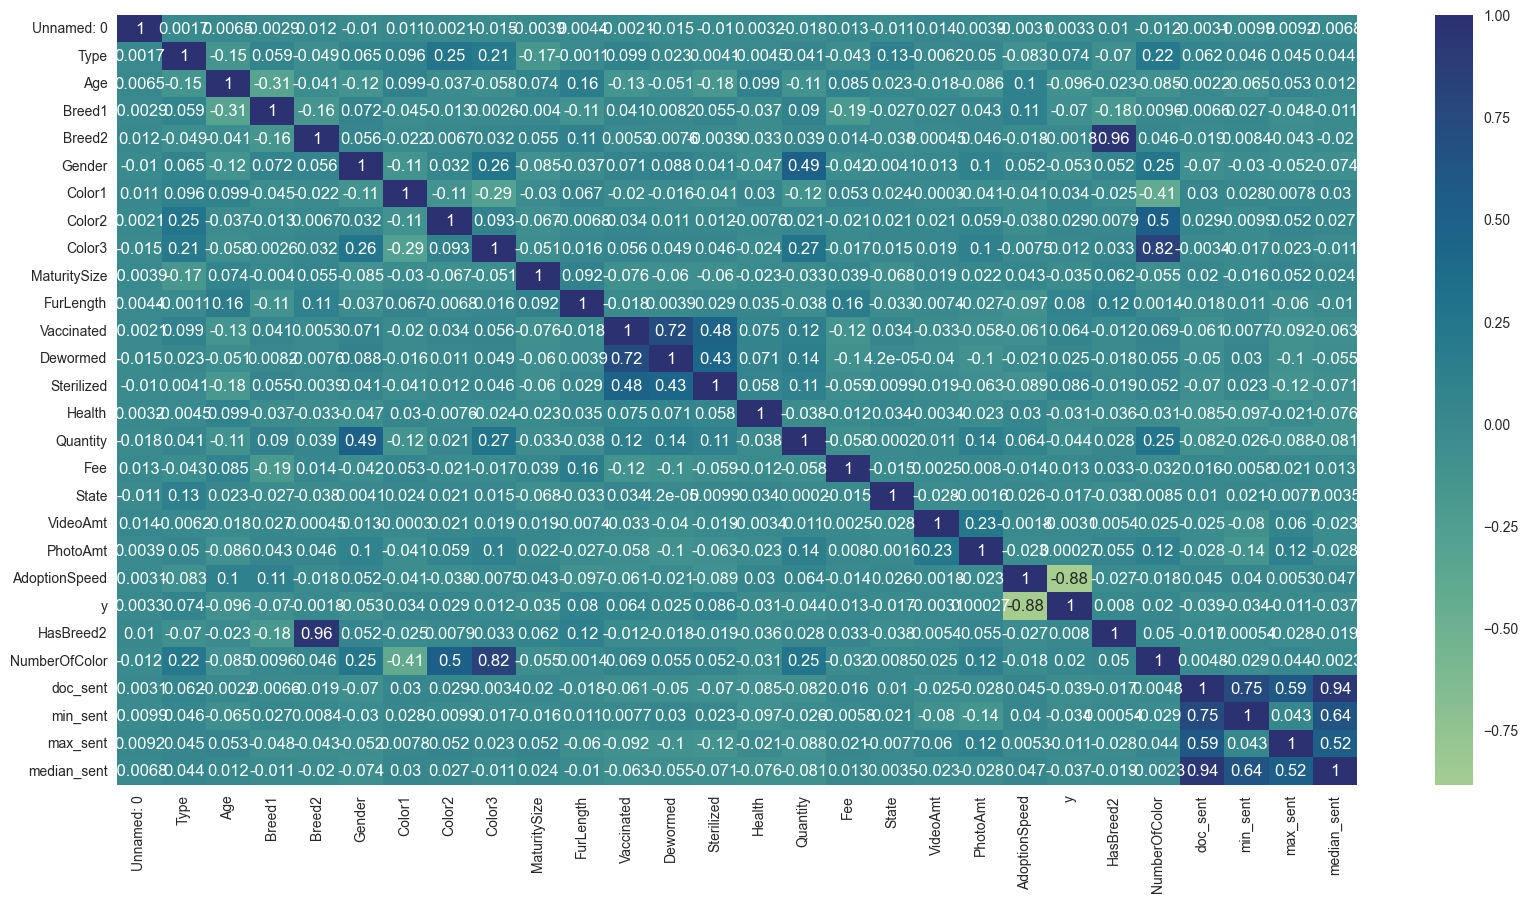

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='crest',annot=True)

In [100]:
# use min_sent and median_sent

In [101]:
top_feats = set(important_features_xgb) & set(important_features_lr)

In [102]:
train.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age',
       'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'y', 'HasBreed2',
       'NumberOfColor', 'doc_sent', 'min_sent',
       'max_sent', 'median_sent'],
      dtype='object')

In [103]:
final_feats = list(top_feats) + [ 'HasBreed2', 'NumberOfColor',
       'min_sent', 'median_sent']

# build model with new feature sets, and tune hyparam

In [104]:
final_feats

['Quantity',
 'Vaccinated',
 'Age',
 'Color3',
 'Breed1',
 'Gender',
 'Type',
 'Sterilized',
 'FurLength',
 'HasBreed2',
 'NumberOfColor',
 'min_sent',
 'median_sent']

In [105]:
X = train[final_feats]
y = train['y']

In [106]:
X.isnull().mean()

Quantity        0.00
Vaccinated      0.00
Age             0.00
Color3          0.00
Breed1          0.00
Gender          0.00
Type            0.00
Sterilized      0.00
FurLength       0.00
HasBreed2       0.00
NumberOfColor   0.00
min_sent        0.04
median_sent     0.04
dtype: float64

In [107]:
X.shape
y.shape

(11994, 13)

(11994,)

In [108]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify= y)

In [109]:
X_train.shape
X_val.shape

(8395, 13)

(3599, 13)

## logistic regression

In [110]:
pipe_lr = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        StandardScaler(),
                        LogisticRegression(multi_class='multinomial', solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_val)
val_acc = pipe_lr.score(X_val, y_val)
print(f'Validation accuracy: {val_acc:.3f}')

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

Validation accuracy: 0.597


In [111]:
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.56819535 0.59916617 0.56343061 0.57832043 0.5807028 ]
CV accuracy: 0.578 +/- 0.012


Text(0.5, 0, 'Number of training examples')

Text(0, 0.5, 'Accuracy')

(0.3, 1.03)

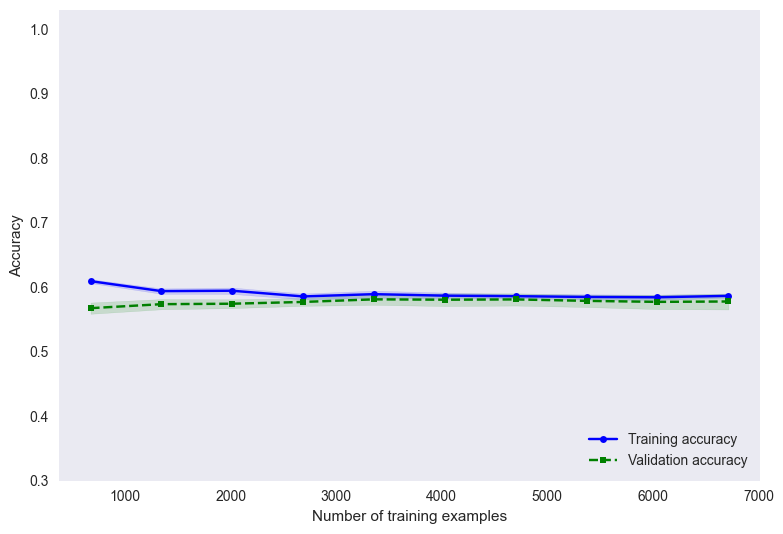

In [112]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

In [113]:
# from this training curve, we see no overfitting issue, but see high bias 

In [114]:
pd.DataFrame(y_pred).value_counts()

1    1920
0    1679
dtype: int64

In [115]:
probas[:, 1]

array([0.90136886, 0.3609629 , 0.8408752 , ..., 0.59636563, 0.8646452 ,
       0.53722906], dtype=float32)

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

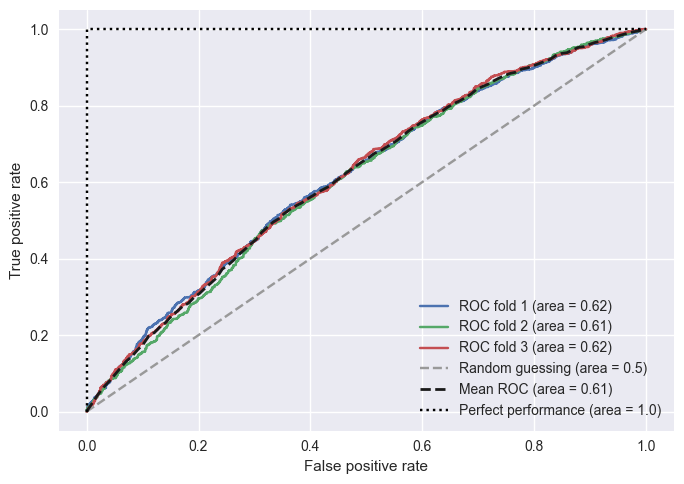

In [116]:


cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_data, test_data) in enumerate(cv):
    probas = pipe_lr.fit(X_train.values[train_data],
                         y_train.values[train_data]).predict_proba(X_train.values[test_data])

    fpr, tpr, thresholds = roc_curve(y_train.values[test_data],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix \n')

Text(0.5, 36.72222222222221, '\n Predicted Values\n')

Text(95.72222222222221, 0.5, 'Actual Values\n')

[Text(0.5, 0, 'more than 1 month'), Text(1.5, 0, 'within 1 month')]

[Text(0, 0.5, 'more than 1 month'), Text(0, 1.5, 'within 1 month')]

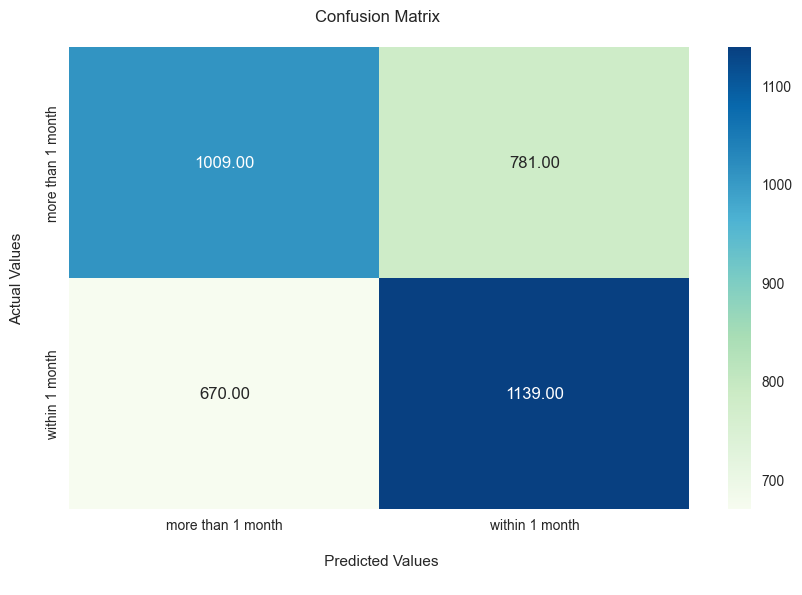

In [117]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
fx.yaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
plt.show()

Feature: 0, Score: -0.05705
Feature: 1, Score: 0.00185
Feature: 2, Score: -0.13194
Feature: 3, Score: 0.01505
Feature: 4, Score: -0.10688
Feature: 5, Score: -0.03413
Feature: 6, Score: 0.06058
Feature: 7, Score: 0.07746
Feature: 8, Score: 0.09691
Feature: 9, Score: -0.01038
Feature: 10, Score: 0.01142
Feature: 11, Score: -0.02423
Feature: 12, Score: -0.02267


<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x7f93d8a6b940>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

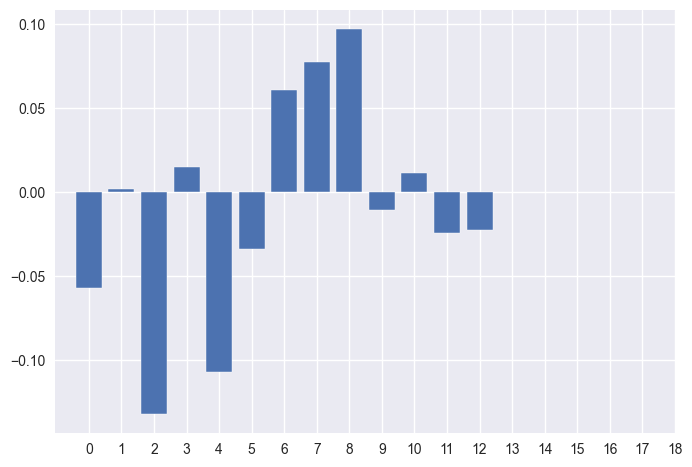

In [118]:
importance = pipe_lr['logisticregression'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0, 19))
pyplot.show()

In [119]:
feature_imp = pd.DataFrame(zip(final_feats, list(importance)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [120]:
feature_imp

var  importance
8       FurLength        0.10
7      Sterilized        0.08
6            Type        0.06
3          Color3        0.02
10  NumberOfColor        0.01
1      Vaccinated        0.00
9       HasBreed2       -0.01
12    median_sent       -0.02
11       min_sent       -0.02
5          Gender       -0.03
0        Quantity       -0.06
4          Breed1       -0.11
2             Age       -0.13

In [121]:
# important_features_lr = feature_imp[feature_imp.importance.abs() >= 0.025]['var'].to_list()

## xgboost

In [122]:
from xgboost import XGBClassifier

In [123]:
pipe_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
pipe_xgb.fit(X_train, y_train)
y_pred = pipe_xgb.predict(X_val)
val_acc = pipe_xgb.score(X_val, y_val)
print(f'Validation accuracy: {val_acc:.3f}')

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Validation accuracy: 0.630


In [124]:
scores = cross_val_score(estimator=pipe_xgb,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.62775462 0.63013699 0.6212031  0.63787969 0.6051221 ]
CV accuracy: 0.624 +/- 0.011


Text(0.5, 0, 'Number of training examples')

Text(0, 0.5, 'Accuracy')

(0.3, 1.03)

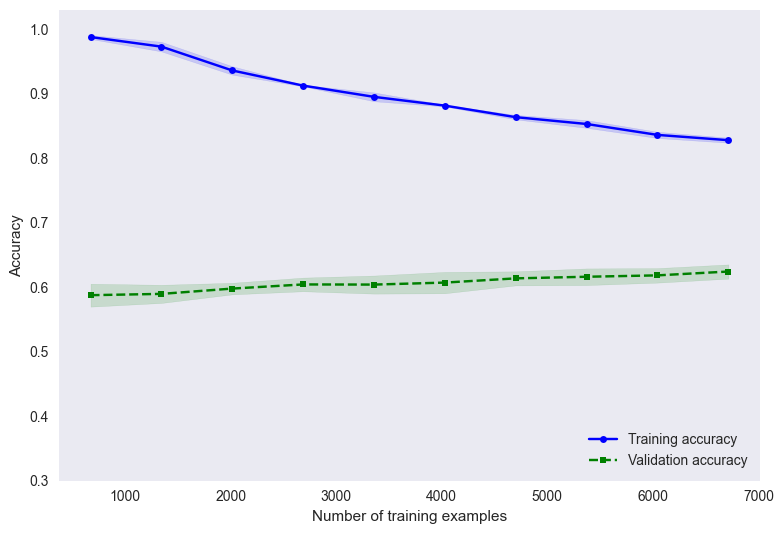

In [125]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_xgb,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

In [126]:
# from this training curve, we see pretty strong overfitting issue

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

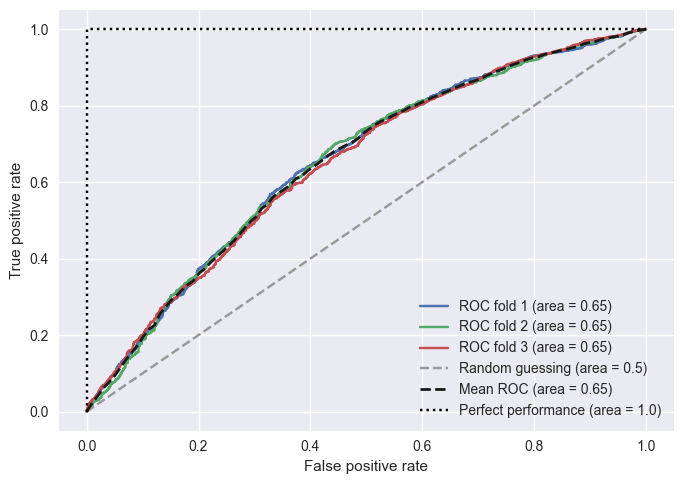

In [127]:
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_data, test_data) in enumerate(cv):
    probas = pipe_xgb.fit(X_train.values[train_data],
                         y_train.values[train_data]).predict_proba(X_train.values[test_data])

    fpr, tpr, thresholds = roc_curve(y_train.values[test_data],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix \n')

Text(0.5, 36.72222222222221, '\n Predicted Values\n')

Text(95.72222222222221, 0.5, 'Actual Values\n')

[Text(0.5, 0, 'more than 1 month'), Text(1.5, 0, 'within 1 month')]

[Text(0, 0.5, 'more than 1 month'), Text(0, 1.5, 'within 1 month')]

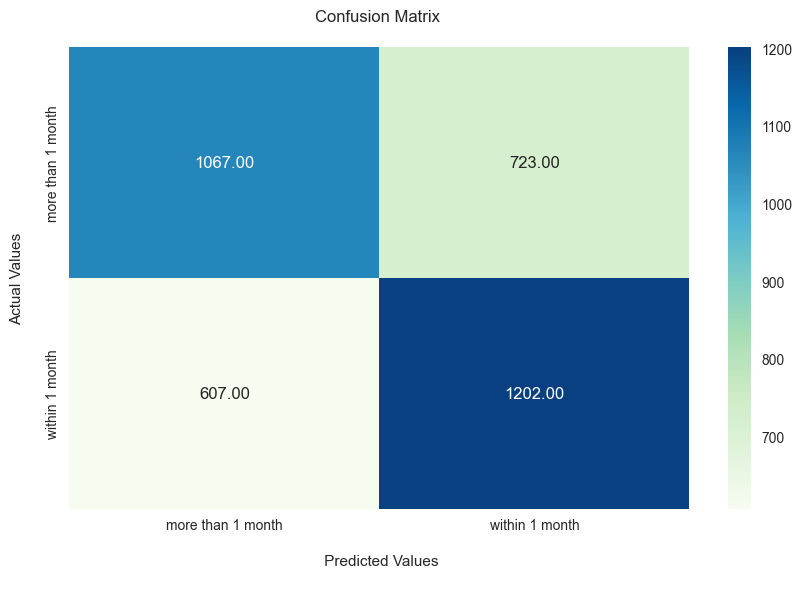

In [128]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
fx.yaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

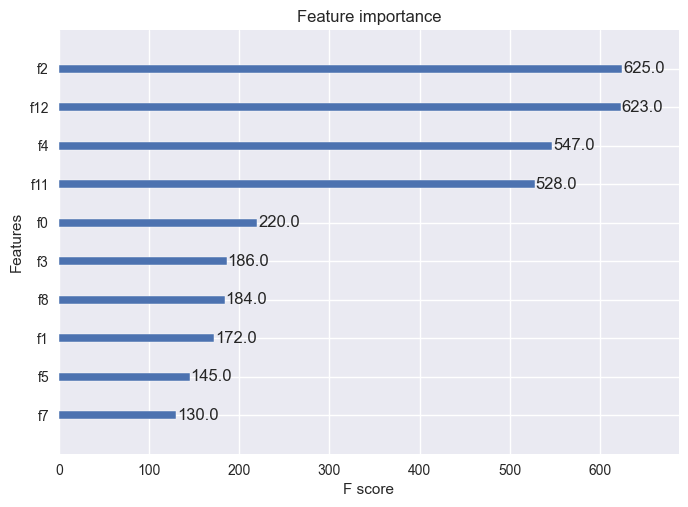

In [129]:
from xgboost import plot_importance
plot_importance(pipe_xgb['xgbclassifier'], max_num_features=10) # top 10 most important features
plt.show()

In [130]:
feature_imp = pd.DataFrame(zip(final_feats, list(importance)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [131]:
feature_imp

var  importance
8       FurLength        0.10
7      Sterilized        0.08
6            Type        0.06
3          Color3        0.02
10  NumberOfColor        0.01
1      Vaccinated        0.00
9       HasBreed2       -0.01
12    median_sent       -0.02
11       min_sent       -0.02
5          Gender       -0.03
0        Quantity       -0.06
4          Breed1       -0.11
2             Age       -0.13

In [132]:
# important_features_xgb = feature_imp.head(12)['var'].to_list()

## random forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
pipe_rf = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        RandomForestClassifier())
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_val)
val_acc = pipe_rf.score(X_val, y_val)
print(f'Validation accuracy: {val_acc:.3f}')

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

Validation accuracy: 0.611


In [135]:
scores = cross_val_score(estimator=pipe_rf,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.62298987 0.60929124 0.61167362 0.63430613 0.59023228]
CV accuracy: 0.614 +/- 0.015


Text(0.5, 0, 'Number of training examples')

Text(0, 0.5, 'Accuracy')

(0.3, 1.03)

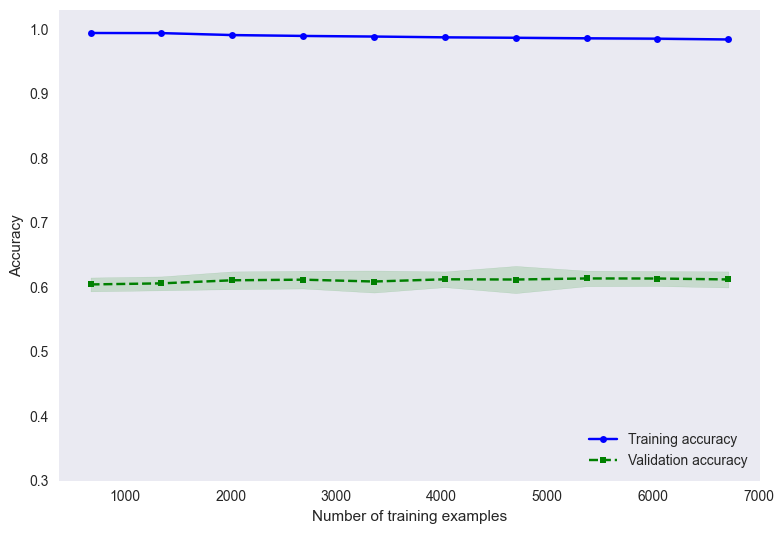

In [136]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_rf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

In [137]:
# from this training curve, we see pretty strong overfitting issue

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

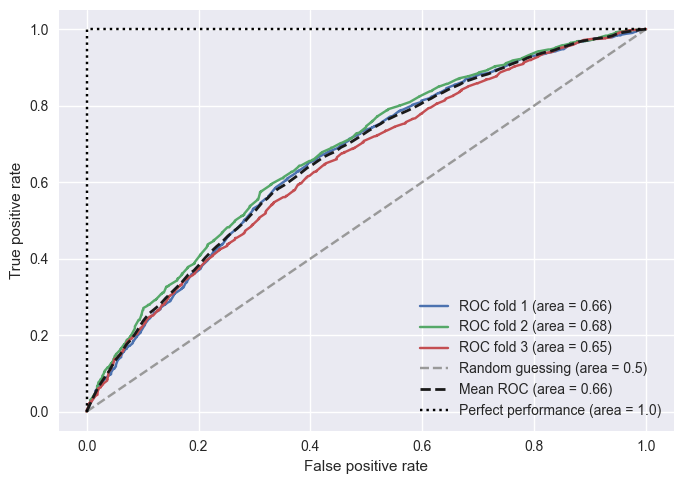

In [138]:
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_data, test_data) in enumerate(cv):
    probas = pipe_rf.fit(X_train.values[train_data],
                         y_train.values[train_data]).predict_proba(X_train.values[test_data])

    fpr, tpr, thresholds = roc_curve(y_train.values[test_data],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix \n')

Text(0.5, 36.72222222222221, '\n Predicted Values\n')

Text(95.72222222222221, 0.5, 'Actual Values\n')

[Text(0.5, 0, 'more than 1 month'), Text(1.5, 0, 'within 1 month')]

[Text(0, 0.5, 'more than 1 month'), Text(0, 1.5, 'within 1 month')]

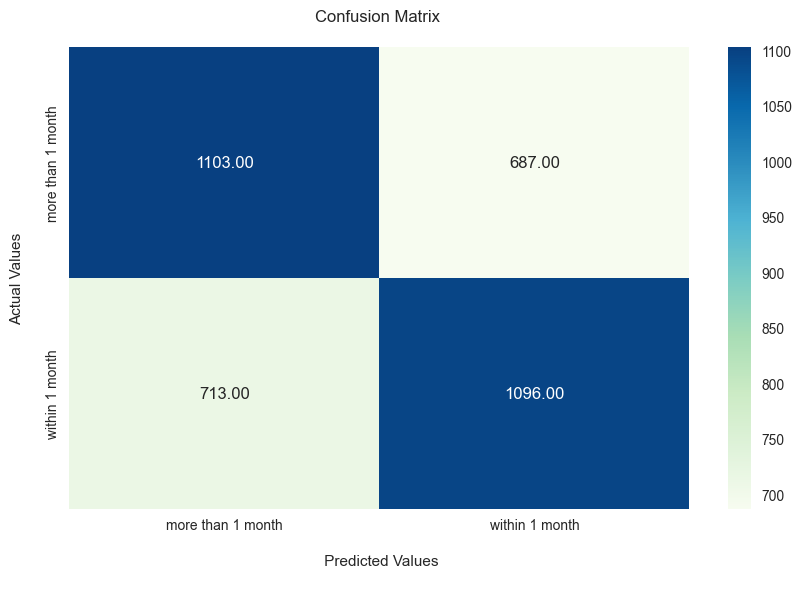

In [139]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_val,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
fx.yaxis.set_ticklabels(['more than 1 month', 'within 1 month'])
plt.show()

Feature: 0, Score: 0.05176
Feature: 1, Score: 0.04612
Feature: 2, Score: 0.16878
Feature: 3, Score: 0.03384
Feature: 4, Score: 0.10335
Feature: 5, Score: 0.04816
Feature: 6, Score: 0.01442
Feature: 7, Score: 0.04694
Feature: 8, Score: 0.04613
Feature: 9, Score: 0.03601
Feature: 10, Score: 0.05015
Feature: 11, Score: 0.16596
Feature: 12, Score: 0.18839


<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x7f93d1c59d60>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

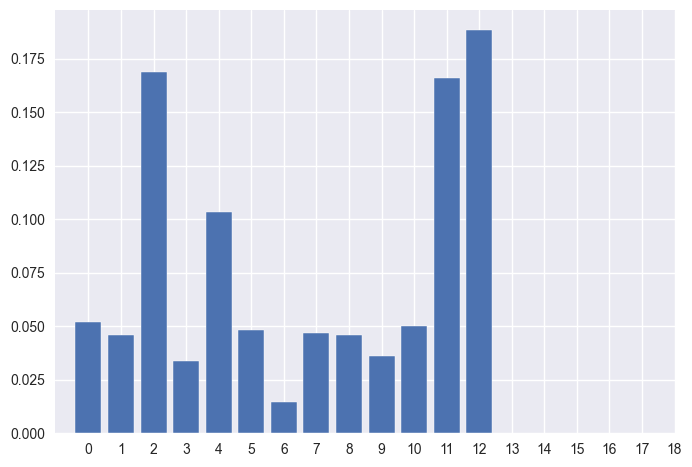

In [140]:
importance = pipe_rf['randomforestclassifier'].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0, 19))
pyplot.show()

In [141]:
feature_imp = pd.DataFrame(zip(final_feats, list(importance)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [142]:
feature_imp

var  importance
12    median_sent        0.19
2             Age        0.17
11       min_sent        0.17
4          Breed1        0.10
0        Quantity        0.05
10  NumberOfColor        0.05
5          Gender        0.05
7      Sterilized        0.05
8       FurLength        0.05
1      Vaccinated        0.05
9       HasBreed2        0.04
3          Color3        0.03
6            Type        0.01

# choose xgboost as final model and do tuning

In [143]:
# we previously know that the xgb model has strong overfitting issue

In [144]:
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Training accuracy: 0.801
Validation accuracy: 0.630


In [145]:
param  = {'learning_rate': 0.1,
         'max_depth': 5,
         'colsample_bytree': 0.5,
         'n_estimators': 100}
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Training accuracy: 0.702
Validation accuracy: 0.639


In [146]:
param  = {'learning_rate': 0.05,
         'max_depth': 5,
         'colsample_bytree': 0.5,
         'n_estimators': 100}
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Training accuracy: 0.684
Validation accuracy: 0.640


In [147]:
param  = {'learning_rate': 0.05,
         'max_depth': 5,
         'colsample_bytree': 0.5,
         'n_estimators': 100,
         'reg_alpha': 0.05}
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Training accuracy: 0.683
Validation accuracy: 0.639


In [148]:
param  = {'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.6,
         'n_estimators': 100,
         'reg_alpha': 0.05}
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Training accuracy: 0.651
Validation accuracy: 0.634


Text(0.5, 0, 'Parameter Learning_Rate')

Text(0, 0.5, 'Accuracy')

(0.5, 1.0)

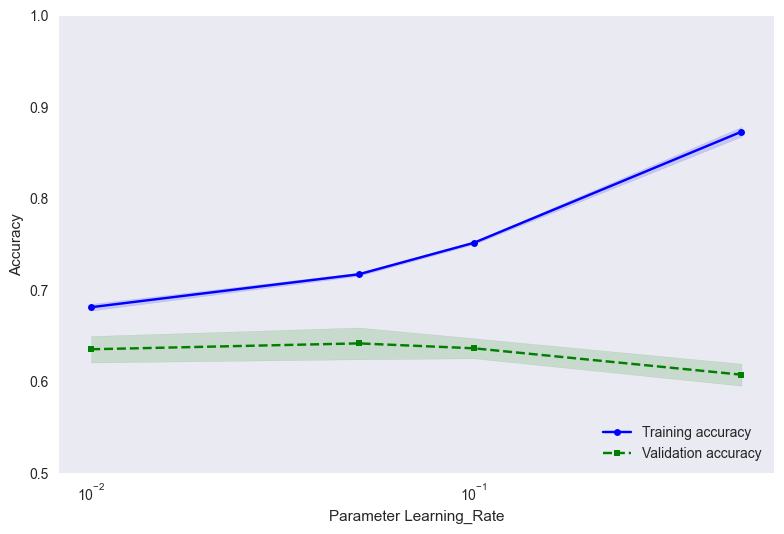

In [149]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [0.01, 0.05, 0.1, 0.5]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__learning_rate', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter Learning_Rate')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [150]:
# best learning rate is 0.05

Text(0.5, 0, 'Parameter max_depth')

Text(0, 0.5, 'Accuracy')

(0.5, 1.0)

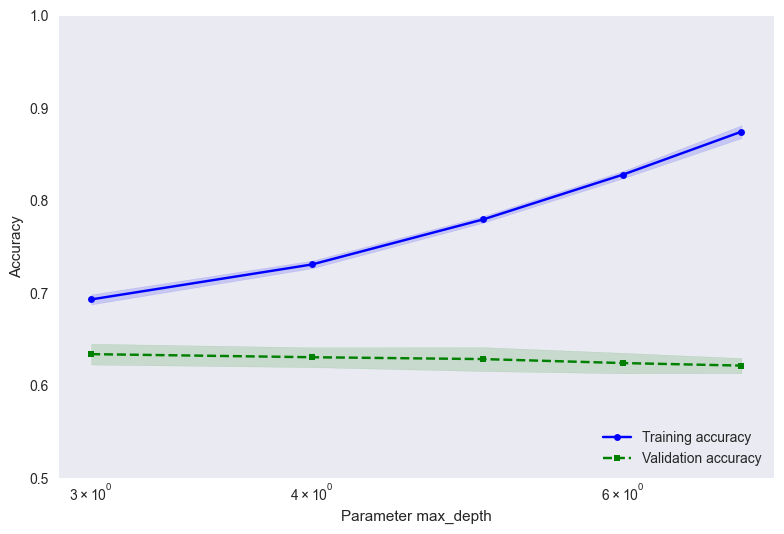

In [151]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [3,4,5,6,7]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__max_depth', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [152]:
# best max_depth is 3

Text(0.5, 0, 'Parameter reg_alpha')

Text(0, 0.5, 'Accuracy')

(0.5, 1.0)

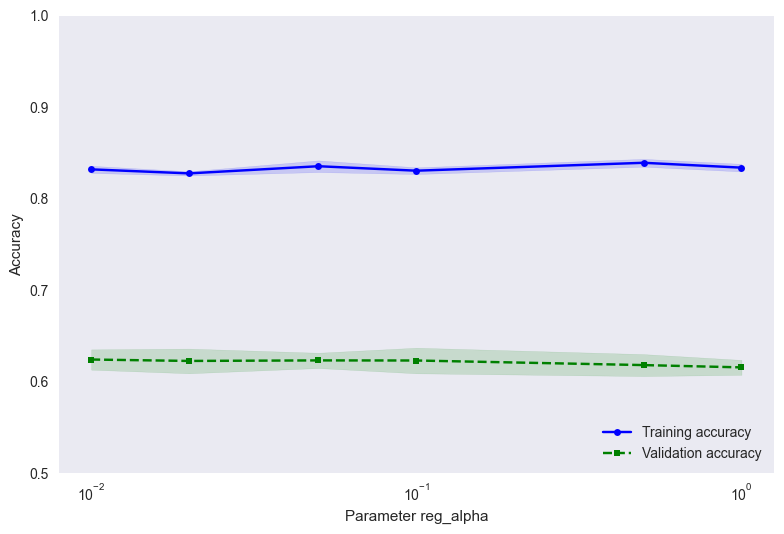

In [153]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [0.01, 0.02, 0.05, 0.1, 0.5, 1]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__reg_alpha', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter reg_alpha')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [154]:
# l1 doesn't impact too much in this case

Text(0.5, 0, 'Parameter n_estimators')

Text(0, 0.5, 'Accuracy')

(0.0, 1.0)

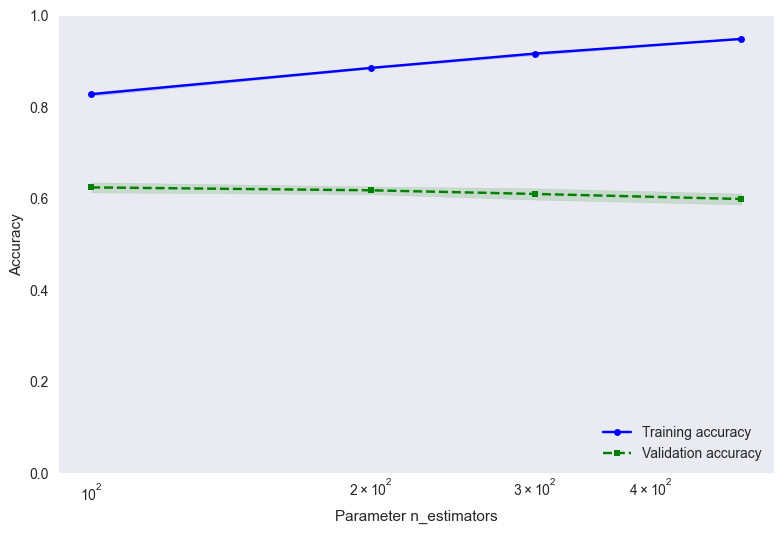

In [155]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [100, 200, 300, 500]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__n_estimators', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [156]:
# best n_estimators is 100

Text(0.5, 0, 'Parameter min_child_weight')

Text(0, 0.5, 'Accuracy')

(0.0, 1.0)

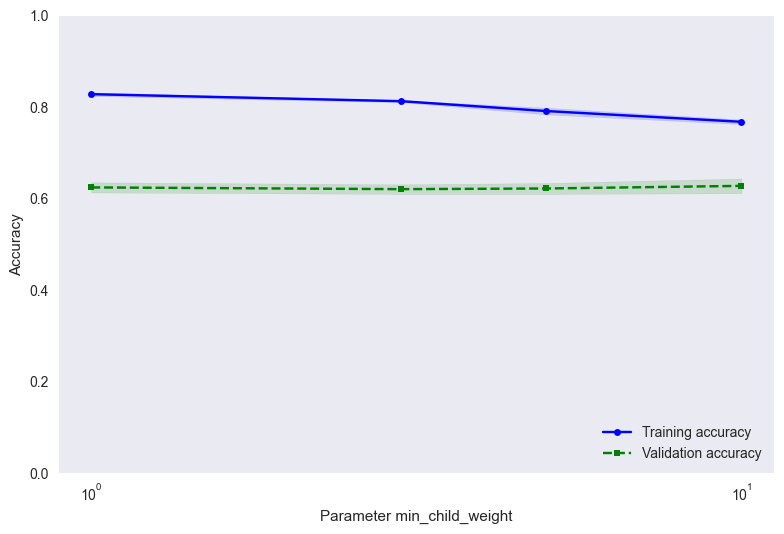

In [157]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [1, 3, 5, 10]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__min_child_weight', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter min_child_weight')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Parameter subsample')

Text(0, 0.5, 'Accuracy')

(0.0, 1.0)

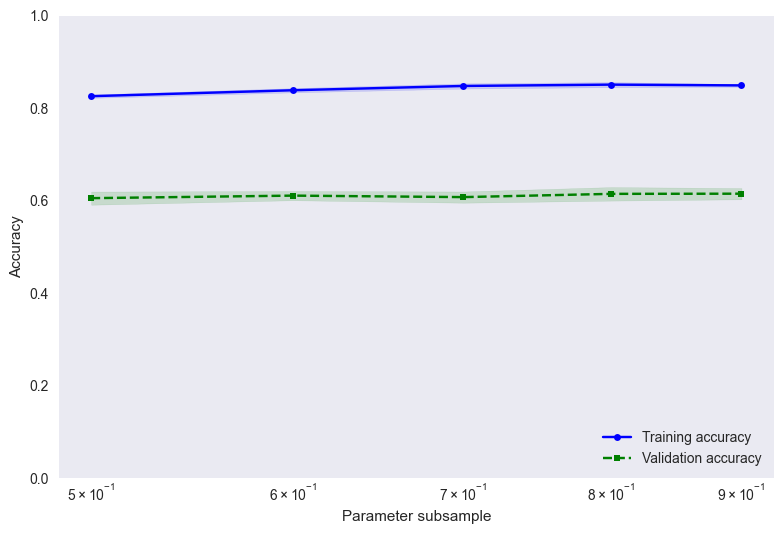

In [158]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [0.5, 0.6, 0.7, 0.8, 0.9]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__subsample', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter subsample')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Parameter colsample_bytree')

Text(0, 0.5, 'Accuracy')

(0.0, 1.0)

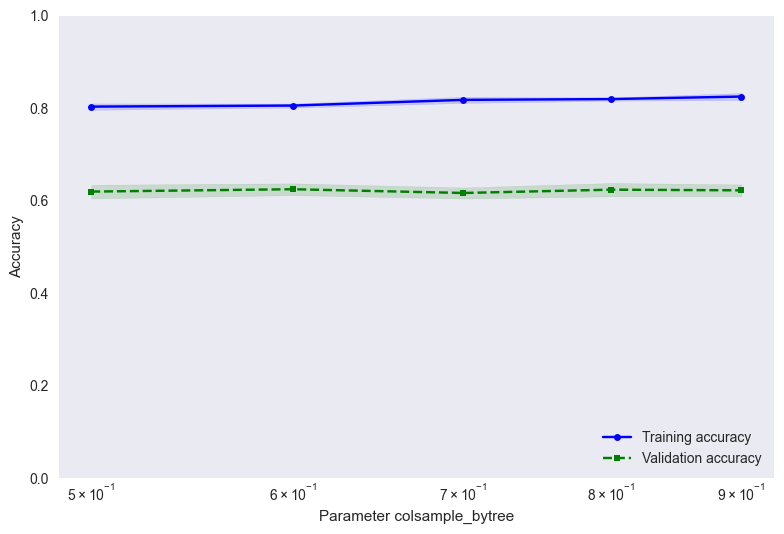

In [159]:
from sklearn.model_selection import validation_curve

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())
param_range = [0.5, 0.6, 0.7, 0.8, 0.9]
train_scores, test_scores = validation_curve(
                estimator=final_xgb, 
                X=X_train, 
                y=y_train, 
                param_name='xgbclassifier__colsample_bytree', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter colsample_bytree')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

In [160]:
from sklearn.model_selection import GridSearchCV

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())

param_grid = [{'xgbclassifier__n_estimators': [100, 150],
                'xgbclassifier__max_depth': [3,4],
                'xgbclassifier__learning_rate': [0.05],
                'xgbclassifier__alpha': [0.1, 0.05], 
                'xgbclassifier__min_child_weight': [8, 10],
                'xgbclassifier__subsample': [0.7, 0.8],
                'xgbclassifier__colsample_bytree': [0.6, 0.7]
              }]

gs = GridSearchCV(estimator=final_xgb, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6409767718880286
{'xgbclassifier__alpha': 0.05, 'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}


In [161]:
pd.DataFrame(gs.cv_results_)

mean_fit_time  std_fit_time  \
0            0.23          0.02   
1            0.25          0.04   
2            0.36          0.02   
3            0.38          0.03   
4            0.25          0.03   
5            0.25          0.04   
6            0.34          0.02   
7            0.37          0.04   
8            0.29          0.01   
9            0.33          0.05   
10           0.50          0.11   
11           0.43          0.02   
12           0.30          0.03   
13           0.31          0.05   
14           0.53          0.09   
15           0.47          0.05   
16           0.32          0.02   
17           0.35          0.06   
18           0.42          0.02   
19           0.41          0.03   
20           0.31          0.05   
21           0.31          0.05   
22           0.38          0.01   
23           0.40          0.02   
24           0.36          0.02   
25           0.41          0.04   
26           0.55          0.07   
27           0.57          0.03   
28           0.42          0.03   
29           0.40          0.04   
30           0.56          0.05   
31           0.60          0.08   
32           0.23          0.01   
33           0.22          0.01   
34           0.31          0.01   
35           0.32          0.01   
36           0.22          0.01   
37           0.22          0.01   
38           0.30          0.02   
39           0.33          0.01   
40           0.29          0.02   
41           0.28          0.02   
42           0.41          0.02   
43           0.41          0.02   
44           0.28          0.02   
45           0.27          0.01   
46           0.40          0.02   
47           0.41          0.03   
48           0.28          0.01   
49           0.28          0.01   
50           0.42          0.01   
51           0.42          0.02   
52           0.31          0.02   
53           0.29          0.01   
54           0.42          0.01   
55           0.41          0.01   
56           0.37          0.01   
57           0.36          0.04   
58           0.55          0.01   
59           0.54          0.03   
60           0.40          0.05   
61           0.36          0.02   
62           0.56          0.05   
63           0.55          0.01   

    mean_score_time  std_score_time  \
0              0.00            0.00   
1              0.00            0.00   
2              0.00            0.00   
3              0.00            0.00   
4              0.00            0.00   
5              0.00            0.00   
6              0.00            0.00   
7              0.00            0.00   
8              0.00            0.00   
9              0.00            0.00   
10             0.00            0.00   
11             0.00            0.00   
12             0.00            0.00   
13             0.00            0.00   
14             0.00            0.00   
15             0.00            0.00   
16             0.00            0.00   
17             0.00            0.00   
18             0.00            0.00   
19             0.00            0.00   
20             0.00            0.00   
21             0.00            0.00   
22             0.00            0.00   
23             0.00            0.00   
24             0.00            0.00   
25             0.00            0.00   
26             0.00            0.00   
27             0.00            0.00   
28             0.00            0.00   
29             0.00            0.00   
30             0.00            0.00   
31             0.00            0.00   
32             0.00            0.00   
33             0.00            0.00   
34             0.00            0.00   
35             0.00            0.00   
36             0.00            0.00   
37             0.00            0.00   
38             0.00            0.00   
39             0.00            0.00   
40             0.00            0.00   
41             0.00            0.00   
42             0.00            0.00   
43          

In [162]:
param  = {'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.7,
         'min_child_weight': 10,
         'n_estimators': 150,
         'subsample': 0.7,
         'alpha': 0.05}

In [163]:
param  = {'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.6,
         'n_estimators': 100,
         'reg_alpha': 0.05}

In [164]:
param  = {'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.7,
         'n_estimators': 100,
         'reg_alpha': 0.05,
         'subsample': 0.8,
         'min_child_weight': 8}
# Training accuracy: 0.655
# Validation accuracy: 0.647

In [165]:
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=8,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

Training accuracy: 0.654
Validation accuracy: 0.636


In [166]:
clf = gs.best_estimator_
print(f'Validation accuracy: {clf.score(X_val, y_val):.3f}')

Validation accuracy: 0.635


In [167]:
param  = {'alpha': 0.05, 
          'colsample_bytree': 0.7, 
          'learning_rate': 0.05, 
          'max_depth': 4, 
          'min_child_weight': 8, 
          'n_estimators': 150, 
          'subsample': 0.8}

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')



Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(alpha=0.05, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.7,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=8,
                               missing=nan, monotone_constraints=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, predictor=None, ...))])

Training accuracy: 0.673
Validation accuracy: 0.644


In [168]:
scores = cross_val_score(estimator=final_xgb,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.63549732 0.65812984 0.63132817 0.64085765 0.61882073]
CV accuracy: 0.637 +/- 0.013


In [169]:
param  = {'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.7,
         'n_estimators': 100,
         'reg_alpha': 0.05,
         'subsample': 0.8,
         'min_child_weight': 8}

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))
final_xgb.fit(X_train, y_train)
y_pred = final_xgb.predict(X_val)
train_acc = final_xgb.score(X_train, y_train)
val_acc = final_xgb.score(X_val, y_val)
print(f'Training accuracy: {train_acc:.3f}')
print(f'Validation accuracy: {val_acc:.3f}')



Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=8,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

Training accuracy: 0.654
Validation accuracy: 0.636


In [170]:
scores = cross_val_score(estimator=final_xgb,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.63907088 0.64681358 0.63847528 0.64740917 0.61941632]
CV accuracy: 0.638 +/- 0.010


In [202]:
param  ={'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.7,
         'n_estimators': 100,
         'reg_alpha': 0.05,
         'subsample': 0.8,
         'min_child_weight': 8}
final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))

Text(0.5, 0, 'Number of training examples')

Text(0, 0.5, 'Accuracy')

(0.3, 1.03)

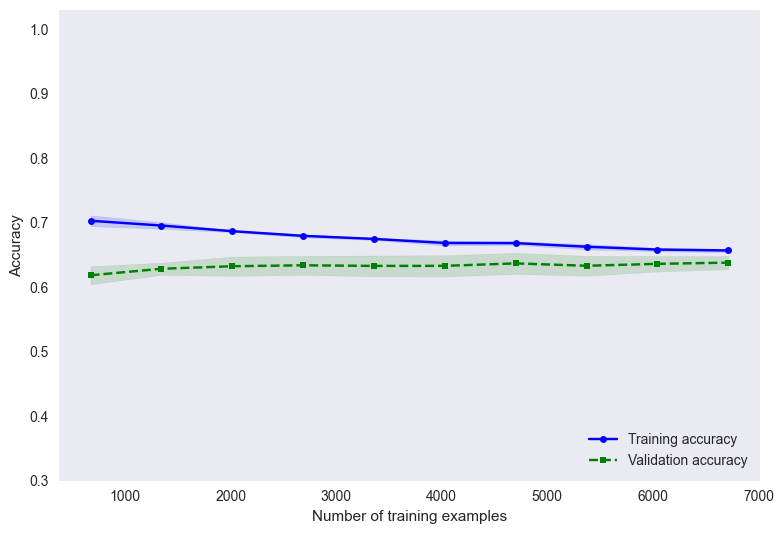

In [203]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=final_xgb,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.show()

In [173]:
# much less overfitting issue

In [174]:
final_xgb

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(alpha=0.05, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.7,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=8,
                               missing=nan, monotone_constraints=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, predictor=None, ...))])

# performance evaluation

1) choose 4 model to compare - lr_default, rf_default, xgb_default, xgb_tuned
2) train on full train set, and report on test set
3) report 'AUC','Accuracy','Precision','Recall','f1-score'

In [175]:
train.shape
test.shape

(11994, 32)

(2999, 31)

In [176]:
train.columns
test.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age',
       'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'y', 'HasBreed2',
       'NumberOfColor', 'doc_sent', 'min_sent',
       'max_sent', 'median_sent'],
      dtype='object')

Index(['Unnamed: 0', 'Type', 'Name', 'Age',
       'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'HasBreed2',
       'NumberOfColor', 'doc_sent', 'min_sent',
       'max_sent', 'median_sent'],
      dtype='object')

In [204]:
model_lr = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        StandardScaler(),
                        LogisticRegression(multi_class='multinomial', solver='lbfgs'))

model_rf = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        RandomForestClassifier())

model_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier())

param  = {'learning_rate': 0.05,
         'max_depth': 3,
         'colsample_bytree': 0.7,
         'n_estimators': 100,
         'reg_alpha': 0.05,
         'subsample': 0.8,
         'min_child_weight': 8}

final_xgb = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        XGBClassifier(**param))

In [210]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred):
    metric_names = ['Accuracy','Precision','Recall','f1-score']
    metric_values_train = [
                    accuracy_score(y_train, y_train_pred),
                    precision_score(y_train, y_train_pred),
                    recall_score(y_train, y_train_pred),
                    f1_score(y_train, y_train_pred)
                   ]
    metric_values_test = [
                    accuracy_score(y_test, y_test_pred),
                    precision_score(y_test, y_test_pred),
                    recall_score(y_test, y_test_pred),
                    f1_score(y_test, y_test_pred)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [197]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [195]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [182]:
X = train[final_feats]
y = train['y']
X_test = test[final_feats]
test['y'] = test.AdoptionSpeed.map({0: 1, 1: 1, 2: 1, 3: 0, 4: 0})
y_test = test['y']

In [405]:
train[final_feats + ['y']].corr()[['y']]

y
Quantity      -0.04
Vaccinated     0.06
Age           -0.10
Color3         0.01
Breed1        -0.07
Gender        -0.05
Type           0.07
Sterilized     0.09
FurLength      0.08
HasBreed2      0.01
NumberOfColor  0.02
min_sent      -0.03
median_sent   -0.04
y              1.00

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot: >

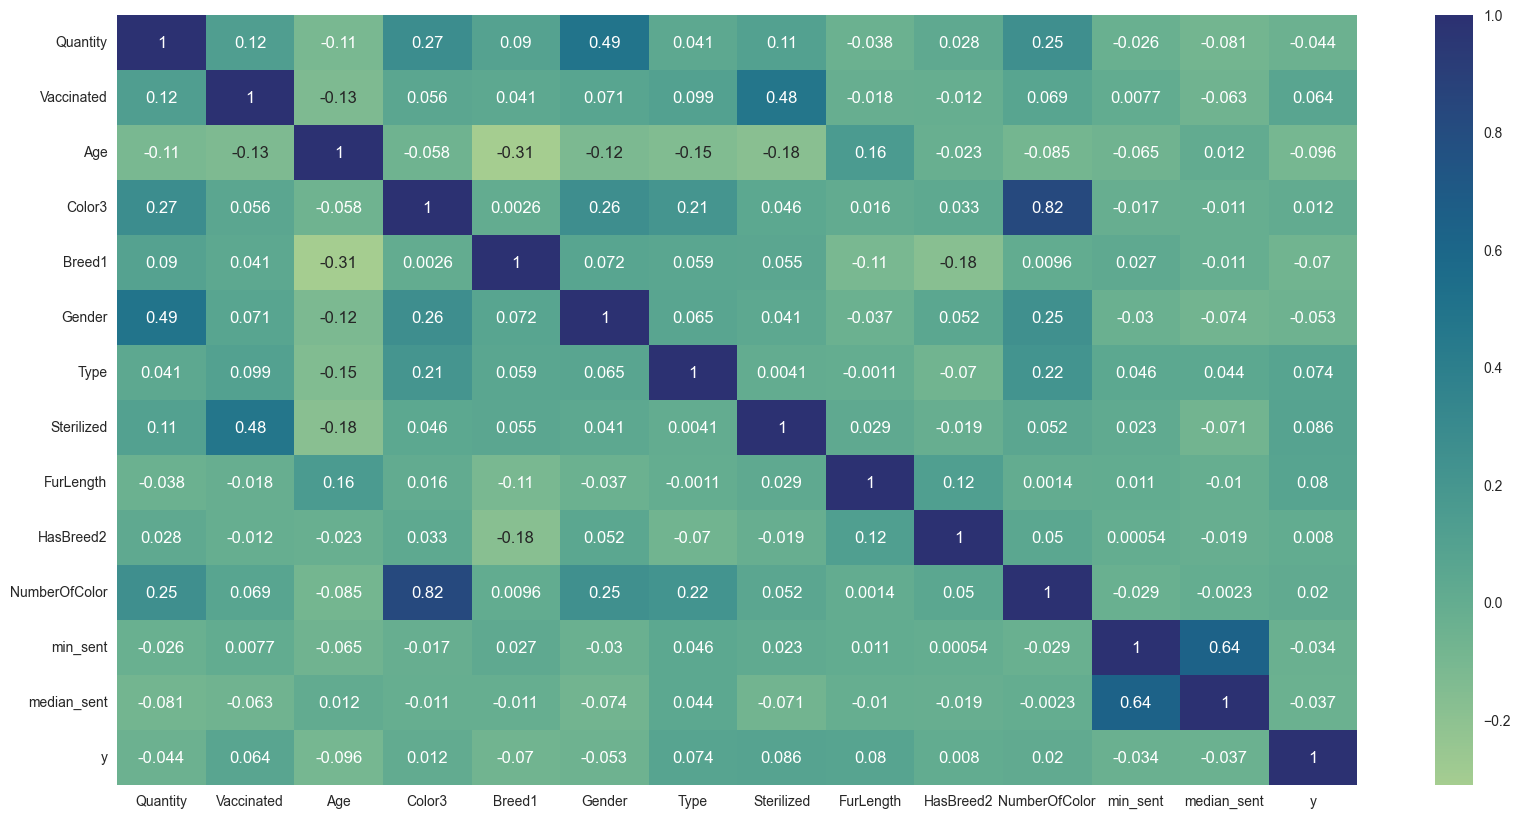

In [406]:
plt.figure(figsize=(20,10))
sns.heatmap(train[final_feats + ['y']].corr(),cmap='crest',annot=True)
# heatmap for correlation

In [186]:
y_test

0       0
1       0
2       0
3       1
4       0
       ..
2994    0
2995    1
2996    1
2997    0
2998    0
Name: y, Length: 2999, dtype: int64

           train  test
metrics               
Accuracy    0.59  0.59
Precision   0.59  0.59
Recall      0.61  0.63
f1-score    0.60  0.61


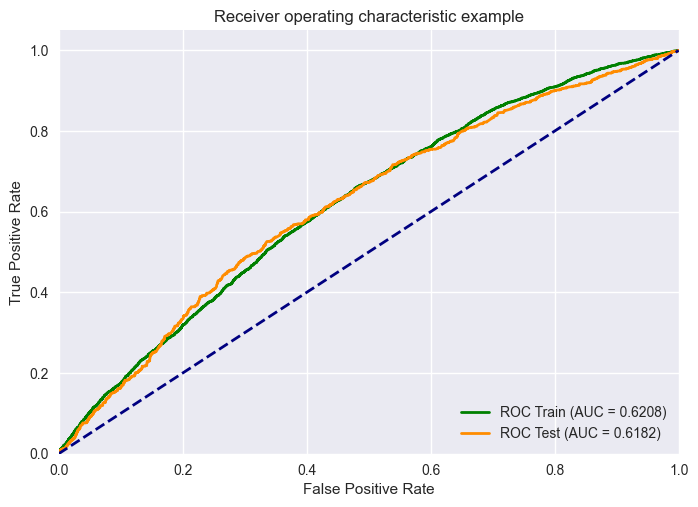

In [211]:
train_test_model(model_lr, X, y, X_test, y_test)

           train  test
metrics               
Accuracy    0.98  0.60
Precision   0.97  0.60
Recall      0.98  0.60
f1-score    0.98  0.60


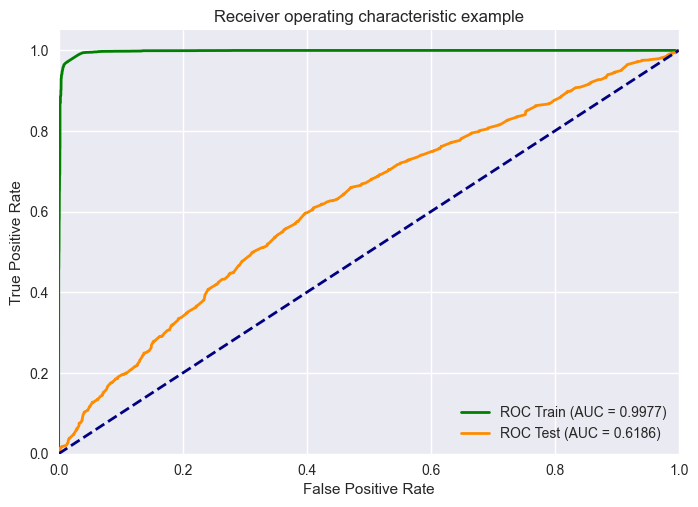

In [212]:
train_test_model(model_rf, X, y, X_test, y_test)

           train  test
metrics               
Accuracy    0.78  0.61
Precision   0.76  0.60
Recall      0.81  0.67
f1-score    0.79  0.63


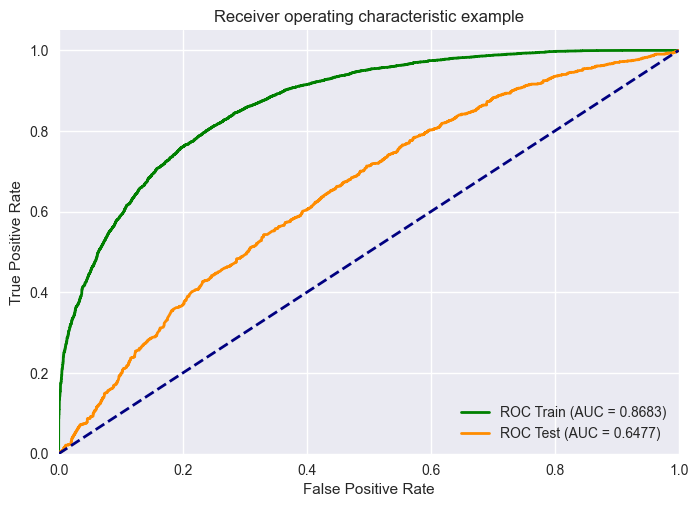

In [213]:
train_test_model(model_xgb, X, y, X_test, y_test)

           train  test
metrics               
Accuracy    0.65  0.62
Precision   0.64  0.60
Recall      0.70  0.69
f1-score    0.67  0.64


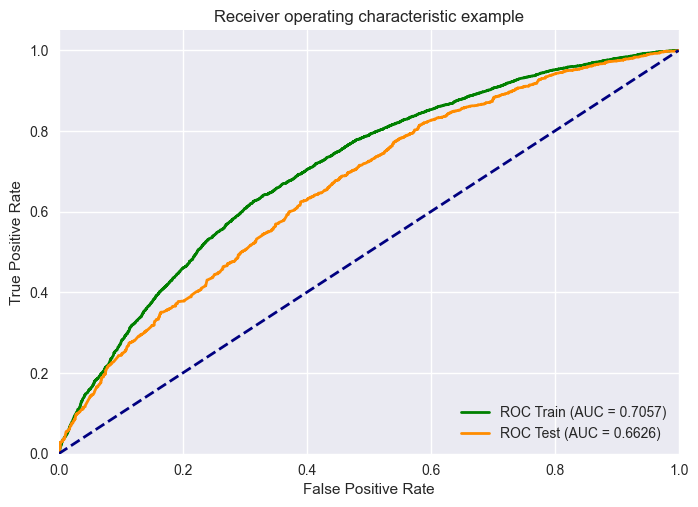

In [214]:
train_test_model(final_xgb, X, y, X_test, y_test)

# interpret the final xgboost model

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

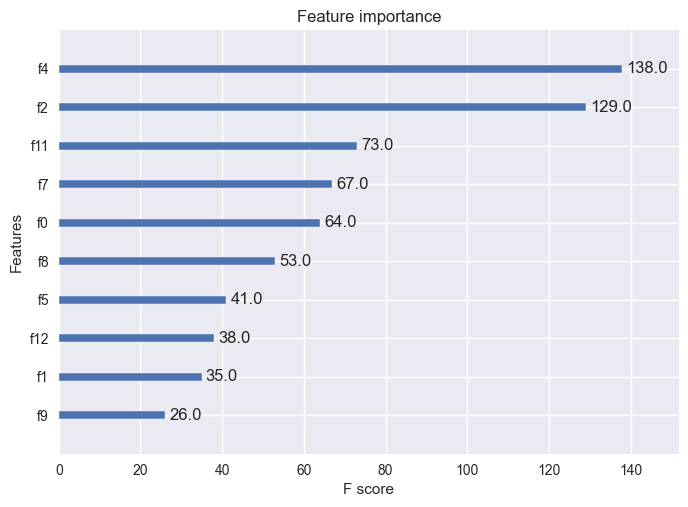

In [216]:
from xgboost import plot_importance
plot_importance(final_xgb['xgbclassifier'], max_num_features=10) # top 10 most important features
plt.show()

In [219]:
feature_imp = pd.DataFrame(zip(final_feats, list(importance)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [220]:
feature_imp

var  importance
12    median_sent        0.19
2             Age        0.17
11       min_sent        0.17
4          Breed1        0.10
0        Quantity        0.05
10  NumberOfColor        0.05
5          Gender        0.05
7      Sterilized        0.05
8       FurLength        0.05
1      Vaccinated        0.05
9       HasBreed2        0.04
3          Color3        0.03
6            Type        0.01

In [222]:
import shap

In [227]:
explainer = shap.Explainer(final_xgb['xgbclassifier'], X)
shap_values = explainer(X)

 99%|===================| 11897/11994 [00:12<00:00]        

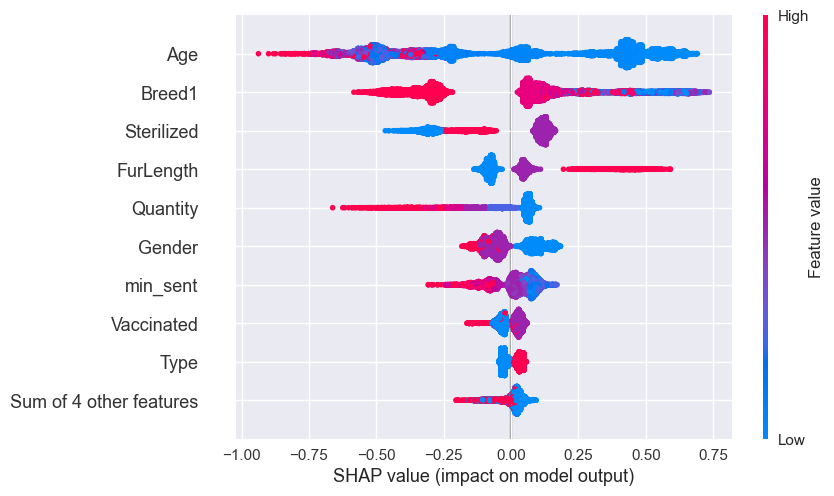

In [228]:
shap.plots.beeswarm(shap_values)

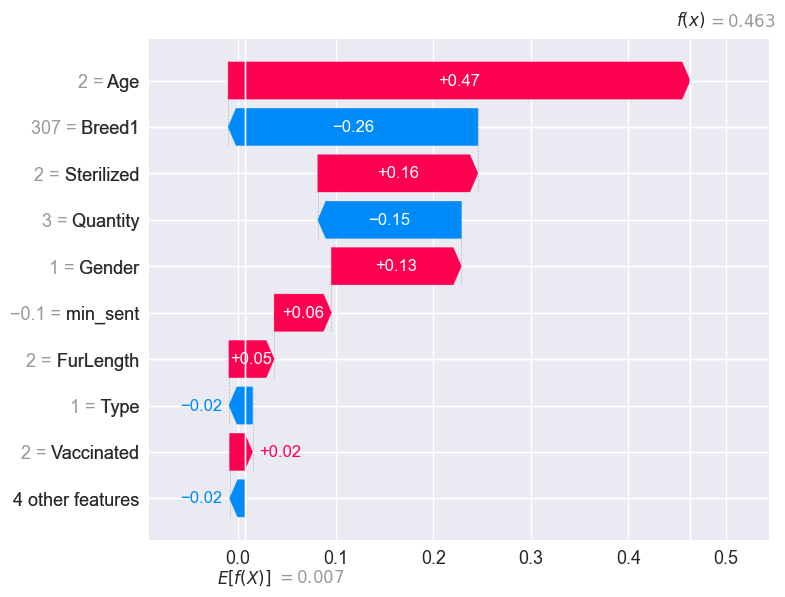

In [229]:
shap.plots.waterfall(shap_values[0])

In [231]:
breed_labels[breed_labels.BreedID == 307]

BreedID  Type    BreedName
240      307     1  Mixed Breed

# clustering analysis

In [259]:
X.columns
train.columns

Index(['Quantity', 'Vaccinated', 'Age', 'Color3',
       'Breed1', 'Gender', 'Type', 'Sterilized',
       'FurLength', 'HasBreed2', 'NumberOfColor',
       'min_sent', 'median_sent'],
      dtype='object')

Index(['Unnamed: 0', 'Type', 'Name', 'Age',
       'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'y', 'HasBreed2',
       'NumberOfColor', 'doc_sent', 'min_sent',
       'max_sent', 'median_sent'],
      dtype='object')

In [367]:
clustering_feas = ['Quantity', 'Vaccinated', 'Age', 
      'Gender', 'Sterilized',
       'FurLength', 'HasBreed2', 'NumberOfColor',
        'VideoAmt', 'PhotoAmt', 'Fee', 'Health', 'MaturitySize']

In [368]:
dog = train[train.Type == 1]
X_cluster = dog[clustering_feas]
y_cluster = dog['y']

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

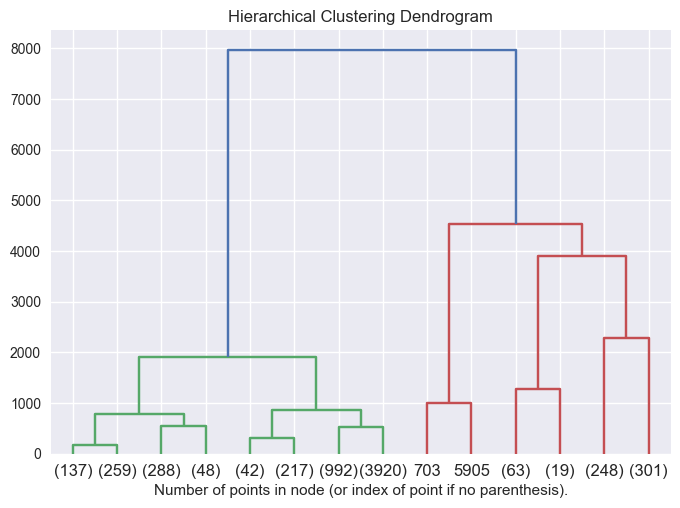

In [369]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    model = model['agglomerativeclustering']
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                        AgglomerativeClustering(distance_threshold=0, n_clusters=None))


model = model.fit(X_cluster)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [370]:
from sklearn.cluster import KMeans


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=1, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=2, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=4, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=5, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=6, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=7, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=9, n_init=10, random_state=0))])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=10, n_init=10, random_state=0))])

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

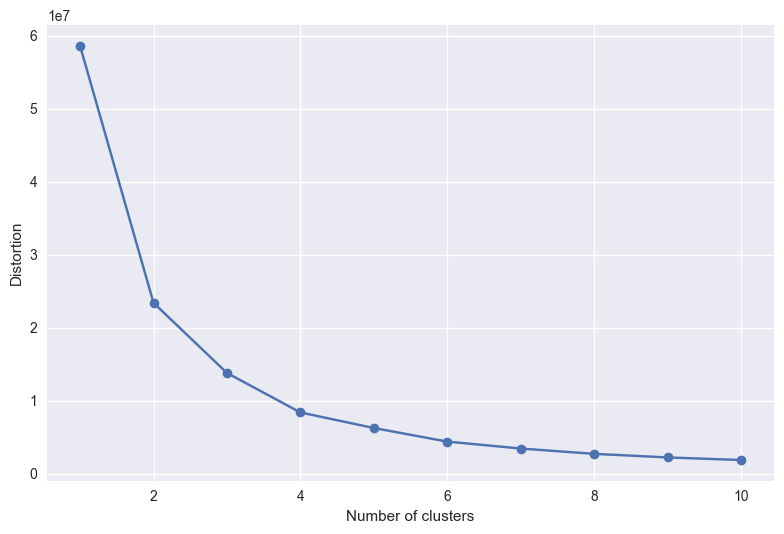

In [371]:
distortions = []
for i in range(1, 11):
    km = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                    KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0))
    km.fit(X_cluster)
    distortions.append(km['kmeans'].inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('figures/10_03.png', dpi=300)
plt.show()

In [372]:
km = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                    KMeans(n_clusters=4, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0))

In [373]:
km.fit(X_cluster)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=4, n_init=10, random_state=0))])

In [374]:
len(km['kmeans'].labels_)

6536

In [375]:
X.shape

(11994, 13)

In [376]:
clusters = X_cluster.copy()
clusters['cluster'] = km['kmeans'].labels_

In [377]:
clusters['cluster']

0        0
1        0
2        0
3        0
5        0
        ..
11986    0
11988    0
11990    0
11991    0
11992    0
Name: cluster, Length: 6536, dtype: int32

In [378]:
from sklearn.ensemble import RandomForestClassifier
y = clusters['cluster'] 
clf = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), RandomForestClassifier())
clf.fit(X_cluster,y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [379]:
feature_imp = pd.DataFrame(zip(X_cluster.columns.to_list(), list(clf['randomforestclassifier'].feature_importances_)), columns = ['var', 'importance']).sort_values('importance', ascending = False)

In [380]:
feature_imp

var  importance
10            Fee        0.87
2             Age        0.03
9        PhotoAmt        0.02
12   MaturitySize        0.02
5       FurLength        0.01
1      Vaccinated        0.01
4      Sterilized        0.01
7   NumberOfColor        0.01
3          Gender        0.01
6       HasBreed2        0.01
0        Quantity        0.00
8        VideoAmt        0.00
11         Health        0.00

In [381]:
clusters.cluster.value_counts()

0    6076
2     375
1      83
3       2
Name: cluster, dtype: int64

In [399]:
clusters['AdoptionSpeed'] = train[train.Type == 1].y

In [400]:
clusters.groupby('cluster').mean()

Quantity  Vaccinated   Age  Gender  \
cluster                                       
0            1.56        1.70 12.27    1.75   
1            1.13        1.31 18.42    1.63   
2            1.18        1.35 22.85    1.58   
3            1.50        2.00 14.00    2.00   

         Sterilized  FurLength  HasBreed2  \
cluster                                     
0              1.93       1.45       0.31   
1              1.88       1.78       0.27   
2              1.65       1.74       0.34   
3              3.00       1.50       0.00   

         NumberOfColor  VideoAmt  PhotoAmt  \
cluster                                      
0                 1.84      0.06      3.72   
1                 1.83      0.01      3.58   
2                 1.80      0.09      3.92   
3                 2.50      0.00      4.00   

            Fee  Health  MaturitySize  \
cluster                                 
0          4.45    1.04          1.95   
1        512.57    1.02          2.02   
2        229.08    1.05          1.84   
3       2500.00    1.00          2.50   

         AdoptionSpeed  
cluster                 
0                 0.46  
1                 0.67  
2                 0.49  
3                 0.50

In [382]:
clusters.groupby('cluster')[['Fee', 'Age']].mean()

Fee   Age
cluster              
0          4.45 12.27
1        512.57 18.42
2        229.08 22.85
3       2500.00 14.00

In [383]:
clusters.groupby('cluster')[['Quantity', 'VideoAmt']].mean()

Quantity  VideoAmt
cluster                    
0            1.56      0.06
1            1.13      0.01
2            1.18      0.09
3            1.50      0.00

In [384]:
pd.DataFrame(clusters.groupby('cluster')[['FurLength']].value_counts())

0
cluster FurLength      
0       1          3584
        2          2261
        3           231
1       1            35
        2            31
        3            17
2       1           160
        2           151
        3            64
3       1             1
        2             1

In [391]:
pd.DataFrame(clusters.groupby('cluster')[['MaturitySize']].mean())

MaturitySize
cluster              
0                1.95
1                2.02
2                1.84
3                2.50

In [386]:
pd.DataFrame(clusters.groupby('cluster')[['HasBreed2']].value_counts(dropna = False))

0
cluster HasBreed2      
0       0.00       4174
        1.00       1902
1       0.00         61
        1.00         22
2       0.00        246
        1.00        129
3       0.00          2

In [387]:
clusters.groupby('cluster')[['PhotoAmt', 'VideoAmt']].mean()

PhotoAmt  VideoAmt
cluster                    
0            3.72      0.06
1            3.58      0.01
2            3.92      0.09
3            4.00      0.00

In [388]:
pd.DataFrame(clusters.groupby('cluster')[['PhotoAmt']].value_counts())

0
cluster PhotoAmt      
0       1.00      1424
        2.00      1106
        3.00       969
        5.00       767
        4.00       705
        6.00       246
        7.00       158
        0.00       136
        8.00       122
        9.00        88
        10.00       82
        11.00       67
        14.00       34
        12.00       32
        13.00       30
        16.00       18
        15.00       15
        21.00       11
        20.00       10
        24.00        8
        30.00        7
        17.00        7
        19.00        6
        18.00        5
        28.00        5
        22.00        5
        23.00        4
        26.00        3
        29.00        3
        25.00        2
        27.00        1
1       3.00        18
        1.00        16
        2.00        14
        5.00        12
        4.00        10
        7.00         3
        6.00         3
        9.00         2
        0.00         2
        24.00        1
        8.00         1
        10.00        1
2       3.00        78
        1.00        69
        2.00        68
        5.00        43
        4.00        42
        8.00        14
        0.00        13
        6.00        11
        7.00         7
        9.00         6
        11.00        5
        13.00        4
        10.00        4
        14.00        3
        20.00        1
        30.00        1
        29.00        1
        25.00        1
        24.00        1
        15.00        1
        19.00        1
        16.00        1
3       3.00         1
        5.00         1

In [ ]:
clusters.groupby('cluster')[['FurLength']].value_counts()

<AxesSubplot: xlabel='Age', ylabel='Type'>

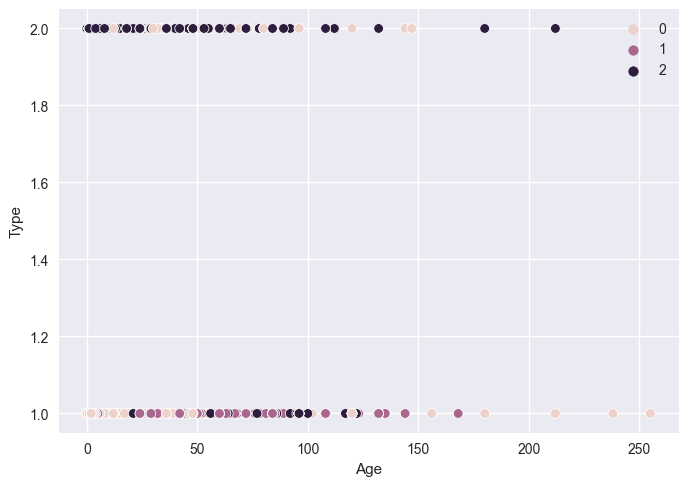

In [252]:
sns.scatterplot(data = X, x = 'Age', y = 'Type', hue =  km['kmeans'].labels_)